## **README**

**ANÁLISIS DE UN DATASET (ORIENTACIÓN DATA SCIENTIST)**

Este análisis forma parte de un proceso de evaluación del Máster Big Data & Data Science de la Universidad Complutense de Madrid y año académico 2023/2024.

**Propuesta de proyecto**:

Desarrollo de un sistema de recomendación que sugiera películas a los usuarios en función de su historial de visualización y preferencias.

**Recopilación y preprocesamiento de datos**

**Fuente de datos:** conjunto de datos de clasificaciones de usuarios y metadatos de películas. The Movies Dataset **(Kaggle)**

URL: https://www.kaggle.com/datasets/rounakbanik/the-movies-dataset

**Descripción del conjunto de datos:**

Este conjunto de datos en Kaggle contiene metadatos de más de 45.000 películas, 26 millones de valoraciones de más de 270.000 usuarios. Incluye clasificaciones, resúmenes, géneros y créditos.

## **Licencia de los datos:**

El conjunto de datos utilizado en este proyecto está **licenciado bajo CC0: Dominio público.**


## **Agradecimientos:**

**Este proyecto utiliza datos recopilados de TMDB y GroupLens.**

### **Datos de TMDB:**

Los detalles de la película, los créditos y las palabras clave se han recopilado de la API abierta de TMDB. **Este producto utiliza la API de TMDb pero no está respaldado ni certificado por TMDb. Su API también brinda acceso a datos sobre muchas películas, actores y actrices, miembros del equipo y programas de televisión adicionales.**

### **Datos de GroupLens:**

Los conjuntos de datos de MovieLens se obtuvieron del sitio web oficial de GroupLens. Estos conjuntos de datos incluyen calificaciones y metadatos de películas recopilados de usuarios.

### **Citación para GroupLens:**

Para reconocer el uso del conjunto de datos en publicaciones, citar el siguiente artículo:

**F. Maxwell Harper y Joseph A. Konstan. 2015. Los conjuntos de datos de MovieLens: historia y contexto. Transacciones ACM sobre sistemas inteligentes interactivos (TiiS) 5, 4: 19:1–19:19. https://doi.org/10.1145/2827872.**

### **Datos de IMDb:**

Para trabajos académicos y no comerciales, IMDb ofrece una subsección de datos de IMDb para descargar únicamente para uso no comercial y no profesional. Para obtener más detalles, consultar:

https://www.imdb.com/interfaces/

Este conjunto de datos es estrictamente para uso académico y cualquier uso del contenido de IMDb en un entorno, servicio o producto comercial requiere una licencia de contenido comercial con IMDb.


### **Citación para IMDb:**

**Datos cortesía de IMDb.**

# **Sistema de recomendación de películas**

## Estructura del proyecto:

1. **Propuesta de proyecto**: Descripción general del proyecto y objetivos.
2. **Recopilación y preprocesamiento de datos**: Obtención y preparación de los datos.
3. **Análisis exploratorio de datos (EDA)**: Exploración de los datos para comprender su estructura y distribución.
4. **Filtrado colaborativo**: Implementación de técnicas de filtrado colaborativo.
5. **Filtrado basado en contenido**: Utilización de características de las películas para recomendaciones.
6. **Creación de modelo**: Desarrollo de modelos de recomendación.
7. **Evaluación y rendimiento del modelo**: Evaluación de la efectividad del sistema de recomendación.
8. **Sistema de recomendación híbrido**: Integración de filtrado colaborativo y basado en contenido.


# **1. Propuesta de proyecto:** Descripción general del proyecto y objetivos.


Este proyecto tiene como objetivo desarrollar un sistema de recomendación de películas utilizando técnicas de filtrado colaborativo y basado en contenido.


A lo largo del desarrollo del proyecto, se seguirá el esquema detallado en la propuesta, desde la recopilación y preprocesamiento de datos hasta la evaluación del modelo y la creación de un sistema de recomendación híbrido.

# **2. Recopilación y preprocesamiento de datos**: Obtención y preparación de los datos.

In [ ]:
from google.colab import drive
import pandas as pd

# Montar Google Drive
drive.mount('/content/drive')

# Rutas de los archivos en Google Drive
ruta_credits = '/content/drive/My Drive/TFM_Recomendador_de_peliculas/credits.csv'
ruta_keywords = '/content/drive/My Drive/TFM_Recomendador_de_peliculas/keywords.csv'
ruta_links_small = '/content/drive/My Drive/TFM_Recomendador_de_peliculas/links_small.csv'
ruta_links = '/content/drive/My Drive/TFM_Recomendador_de_peliculas/links.csv'
ruta_movies_metadata = '/content/drive/My Drive/TFM_Recomendador_de_peliculas/movies_metadata.csv'
ruta_ratings_small = '/content/drive/My Drive/TFM_Recomendador_de_peliculas/ratings_small.csv'
ruta_ratings = '/content/drive/My Drive/TFM_Recomendador_de_peliculas/ratings.csv'

# Leer los archivos CSV
credits = pd.read_csv(ruta_credits)
keywords = pd.read_csv(ruta_keywords)
links_small = pd.read_csv(ruta_links_small)
links = pd.read_csv(ruta_links)
movies_metadata = pd.read_csv(ruta_movies_metadata)
ratings_small = pd.read_csv(ruta_ratings_small)
ratings = pd.read_csv(ruta_ratings)


Mounted at /content/drive


<ipython-input-1-ca008fc9191c>:21: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  movies_metadata = pd.read_csv(ruta_movies_metadata)


# **3. Análisis exploratorio de datos (EDA):** Exploración de los datos para comprender su estructura y distribución.

Dado que estamos desarrollando un sistema de recomendación de películas, vamos a centrar el análisis exploratorio de datos (EDA) en comprender mejor las características de las películas, las preferencias de los usuarios y cualquier otro aspecto relevante para el sistema de recomendación.



**Entendiendo la estructura y el contenido de cada DataFrame.**

In [ ]:
# Mostrar las primeras filas de cada DataFrame
print("Credits DataFrame:")
print(credits.head())
print("\n")

print("Keywords DataFrame:")
print(keywords.head())
print("\n")

print("Links Small DataFrame:")
print(links_small.head())
print("\n")

print("Links DataFrame:")
print(links.head())
print("\n")

print("Movies Metadata DataFrame:")
print(movies_metadata.head())
print("\n")

print("Ratings Small DataFrame:")
print(ratings_small.head())
print("\n")

print("Ratings DataFrame:")
print(ratings.head())
print("\n")

# Mostrar información sobre las columnas y los tipos de datos de cada DataFrame
print("Credits DataFrame info:")
print(credits.info())
print("\n")

print("Keywords DataFrame info:")
print(keywords.info())
print("\n")

print("Links Small DataFrame info:")
print(links_small.info())
print("\n")

print("Links DataFrame info:")
print(links.info())
print("\n")

print("Movies Metadata DataFrame info:")
print(movies_metadata.info())
print("\n")

print("Ratings Small DataFrame info:")
print(ratings_small.info())
print("\n")

print("Ratings DataFrame info:")
print(ratings.info())
print("\n")


Credits DataFrame:
                                                cast  \
0  [{'cast_id': 14, 'character': 'Woody (voice)',...   
1  [{'cast_id': 1, 'character': 'Alan Parrish', '...   
2  [{'cast_id': 2, 'character': 'Max Goldman', 'c...   
3  [{'cast_id': 1, 'character': "Savannah 'Vannah...   
4  [{'cast_id': 1, 'character': 'George Banks', '...   

                                                crew     id  
0  [{'credit_id': '52fe4284c3a36847f8024f49', 'de...    862  
1  [{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...   8844  
2  [{'credit_id': '52fe466a9251416c75077a89', 'de...  15602  
3  [{'credit_id': '52fe44779251416c91011acb', 'de...  31357  
4  [{'credit_id': '52fe44959251416c75039ed7', 'de...  11862  


Keywords DataFrame:
      id                                           keywords
0    862  [{'id': 931, 'name': 'jealousy'}, {'id': 4290,...
1   8844  [{'id': 10090, 'name': 'board game'}, {'id': 1...
2  15602  [{'id': 1495, 'name': 'fishing'}, {'id': 12392...
3  31357  

# **Movies Metadata**

# **Exploración de la distribución de géneros de películas**

Procedemos a calcular cuáles son los géneros de películas más populares para comprender mejor qué tipos de películas están presentes en nuestro conjunto de datos.


In [ ]:
import pandas as pd
import ast

# Inicializar un diccionario para contar la frecuencia de cada género
genre_counts = {}

# Iterar sobre cada fila del DataFrame para contar la frecuencia de cada género
for genres_str in movies_metadata['genres']:
    genres_list = ast.literal_eval(genres_str)  # Convertir la cadena a una lista de diccionarios
    for genre in genres_list:
        name = genre['name']
        if name in genre_counts:
            genre_counts[name] += 1
        else:
            genre_counts[name] = 1

# Convertir el diccionario en un DataFrame para mejor visualización
genre_counts_df = pd.DataFrame(list(genre_counts.items()), columns=['Genre', 'Frequency'])

# Ordenar el DataFrame por frecuencia en orden descendente
genre_counts_df = genre_counts_df.sort_values(by='Frequency', ascending=False)

print(genre_counts_df)


                                    Genre  Frequency
6                                   Drama      20265
1                                  Comedy      13182
9                                Thriller       7624
5                                 Romance       6735
7                                  Action       6596
10                                 Horror       4673
8                                   Crime       4307
17                            Documentary       3932
3                               Adventure       3496
12                        Science Fiction       3049
2                                  Family       2770
13                                Mystery       2467
4                                 Fantasy       2313
0                               Animation       1935
15                                Foreign       1622
16                                  Music       1598
11                                History       1398
14                                    War     

Como podemos observar, los géneros más comunes son Drama, Comedia y Thriller, mientras que los menos comunes incluyen War, Western, TV Movie y varios otros géneros menos convencionales.

# **Estadísticas Descriptivas** (columna runtime)

Primero calcularemos a partir de la columna **runtime** estadísticas descriptivas como la duración media, mínima, máxima y la desviación estándar y visualizaremos esta distribución utilizando un histograma.

Estadísticas descriptivas de la duración de las películas:
count    45203.000000
mean        94.128199
std         38.407810
min          0.000000
25%         85.000000
50%         95.000000
75%        107.000000
max       1256.000000
Name: runtime, dtype: float64


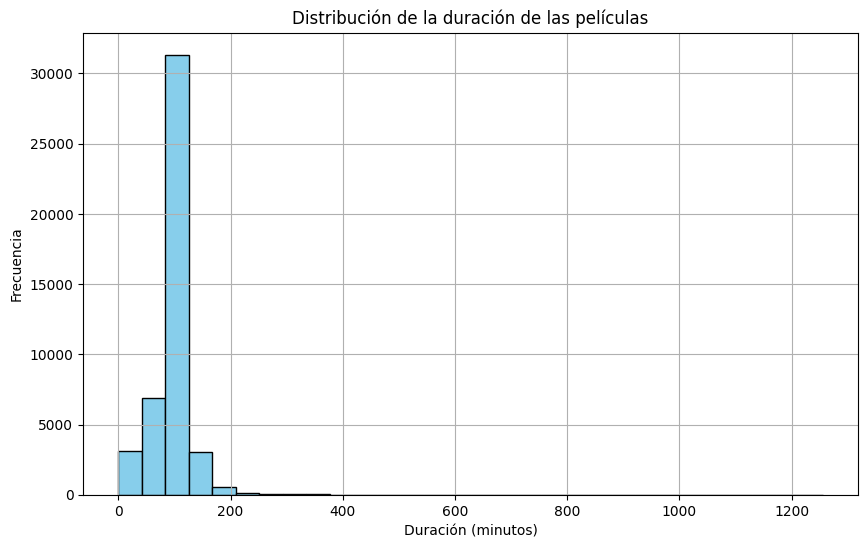

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Calcular estadísticas descriptivas de la duración de las películas
duration_stats = movies_metadata['runtime'].describe()

# Imprimir las estadísticas descriptivas
print("Estadísticas descriptivas de la duración de las películas:")
print(duration_stats)

# Crear un histograma de la duración de las películas
plt.figure(figsize=(10, 6))
plt.hist(movies_metadata['runtime'].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.title('Distribución de la duración de las películas')
plt.xlabel('Duración (minutos)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()


**Comentario estadísticas descriptivas:**

**Count (Recuento):** Hay un total de 45,203 películas con valores de duración disponibles.

**Mean (Media):** La duración promedio de las películas es de aproximadamente 94 minutos.

**Std (Desviación estándar):** La desviación estándar es de aproximadamente 38.41 minutos, lo que indica la dispersión de los datos alrededor de la media.

**Min (Mínimo):** La duración mínima de una película es 0 minutos, lo que probablemente indique datos faltantes o películas extremadamente cortas.

**25% (Percentil 25):** El 25% de las películas tienen una duración de 85 minutos o menos.

**50% (Percentil 50 o Mediana):** El 50% de las películas tienen una duración de 95 minutos o menos.

**75% (Percentil 75):** El 75% de las películas tienen una duración de 107 minutos o menos.

**Max (Máximo):** La duración máxima de una película es de 1256 minutos.


**Comentario Histograma**

La representación gráfica proporciona una visión general de cómo se distribuyen las duraciones de las películas en el conjunto de datos.

Como se puede apreciar, la mayoría de las películas tienen una duración que oscila entre aproximadamente 50 y 150 minutos, ya que la mayor densidad de barras del histograma se encuentra en esta región.

Hay un pico pronunciado alrededor de la media de 94 minutos, lo que indica que muchas películas tienen una duración cercana a este valor mientras que algunas otras películas son visibles como barras más pequeñas en el extremo derecho del histograma, alrededor de los 400 minutos.

**Las 10 películas más largas**

In [ ]:
# Ordenar el DataFrame de películas por runtime de forma descendente
most_runtime_movies = movies_metadata.sort_values(by='runtime', ascending=False)

# Mostrar las primeras 10 entradas para identificar las películas más populares
print(most_runtime_movies[['title', 'runtime']].head(10))


                                     title  runtime
24178                           Centennial   1256.0
40938                             Baseball   1140.0
19965                                 Jazz   1140.0
13767                Berlin Alexanderplatz    931.0
13953       Heimat: A Chronicle of Germany    925.0
27855        The Story of Film: An Odyssey    900.0
26682                                Taken    877.0
19158                              The War    874.0
34667  The Roosevelts: An Intimate History    840.0
34732          Seventeen Moments in Spring    840.0


# **Estadísticas Descriptivas** (columna popularity)
Ahora revisaremos qué películas son las más populares utilizando la columna de **popularity**.

Estadísticas descriptivas de la popularidad de las películas:
count    45460.000000
mean         2.921478
std          6.005414
min          0.000000
25%          0.385948
50%          1.127685
75%          3.678902
max        547.488298
Name: popularity, dtype: float64


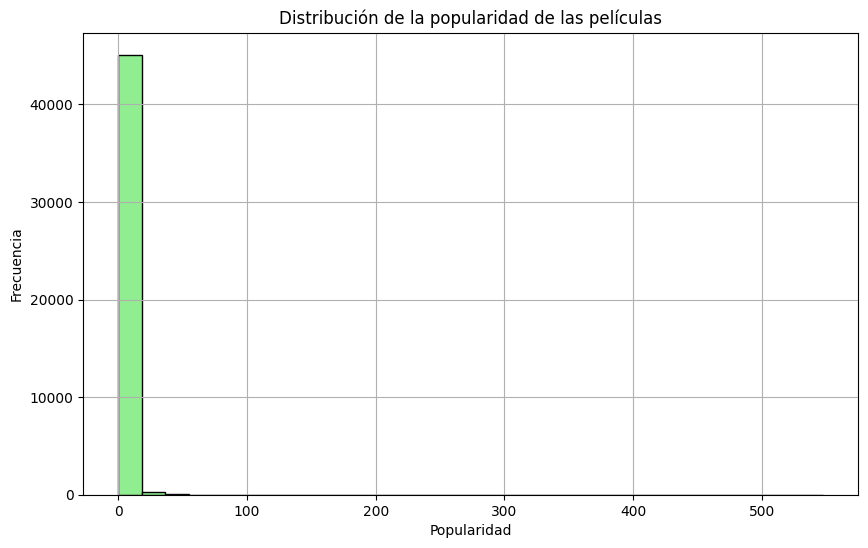

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Convertir la columna 'popularity' a números flotantes
movies_metadata['popularity'] = pd.to_numeric(movies_metadata['popularity'], errors='coerce')

# Calcular estadísticas descriptivas de la popularidad de las películas
popularity_stats = movies_metadata['popularity'].describe()

# Imprimir las estadísticas descriptivas
print("Estadísticas descriptivas de la popularidad de las películas:")
print(popularity_stats)

# Crear un histograma de la popularidad de las películas
plt.figure(figsize=(10, 6))
plt.hist(movies_metadata['popularity'].dropna(), bins=30, color='lightgreen', edgecolor='black')
plt.title('Distribución de la popularidad de las películas')
plt.xlabel('Popularidad')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()


**Comentario Estadísticas descriptivas** (popularidad de las películas):

**Count (Recuento):** Indica que hay un total de 45,460 películas con valores de popularidad disponibles.

**Mean (Media):** La popularidad promedio de las películas es aproximadamente 2.92.

**Std (Desviación estándar):** La desviación estándar es de aproximadamente 6.01, lo que indica la dispersión de los datos alrededor de la media.

**Min (Mínimo):** La popularidad mínima de una película es 0.

**25% (Percentil 25):** El 25% de las películas tienen una popularidad de 0.39 o menos.

**50% (Percentil 50 o Mediana):** El 50% de las películas tienen una popularidad de 1.13 o menos.

**75% (Percentil 75):** El 75% de las películas tienen una popularidad de 3.68 o menos.

**Max (Máximo):** La popularidad máxima de una película es 547.49.

**Comentario Histograma** (popularidad de las películas):

La mayoría de las películas tienen una popularidad que oscila entre 0 y alrededor de 10, ya que la mayor densidad de barras del histograma se encuentra en esta región.

Hay un pico pronunciado alrededor de la media de 2.92, lo que indica que muchas películas tienen una popularidad cercana a este valor. Sin embargo, algunas películas tienen una popularidad muy alta, como se evidencia por las barras más pequeñas en el extremo derecho del histograma, llegando hasta 547.49 haciendo que la distribución de la popularidad esté sesgada hacia la derecha aumentando con ello el promedio y la desviación estándar.

**Las 10 películas más populares**

In [ ]:
# Ordenar el DataFrame de películas por popularidad de forma descendente
most_popular_movies = movies_metadata.sort_values(by='popularity', ascending=False)

# Mostrar las primeras 10 entradas para identificar las películas más populares
print(most_popular_movies[['title', 'popularity']].head(10))


                                title  popularity
30700                         Minions  547.488298
33356                    Wonder Woman  294.337037
42222            Beauty and the Beast  287.253654
43644                     Baby Driver  228.032744
24455                      Big Hero 6  213.849907
26564                        Deadpool  187.860492
26566  Guardians of the Galaxy Vol. 2  185.330992
14551                          Avatar  185.070892
24351                       John Wick  183.870374
23675                       Gone Girl  154.801009


Es importante tener en cuenta que la popularidad es una métrica subjetiva por lo que una puntuación de popularidad alta no necesariamente significa que una película sea objetivamente mejor que otras, sino que ha generado un mayor interés o atención en el público. La popularidad de una película puede estar influenciada por diversos factores como el éxito en taquilla, las críticas, la promoción, entre otros.

**Los 10 géneros más populares**

In [ ]:
import pandas as pd

# Convertir la columna 'genres' en una lista de géneros
movies_metadata['genres'] = movies_metadata['genres'].apply(lambda x: [genre['name'] for genre in eval(x)])

# Crear un DataFrame separado para cada género en la lista de géneros de cada película
genre_dfs = [movies_metadata.explode('genres')]

# Calcular la popularidad promedio para cada género excluyendo los géneros con valores NaN
genre_avg_popularity = {}
for genre_df in genre_dfs:
    genre_popularity = genre_df.groupby('genres')['popularity'].mean()
    genre_avg_popularity.update({genre: popularity for genre, popularity in genre_popularity.items() if not pd.isna(popularity)})

# Ordenar los géneros por su popularidad promedio de forma descendente
popular_genres = sorted(genre_avg_popularity.items(), key=lambda x: x[1], reverse=True)

# Mostrar los N géneros más populares
N = 10  # Número de géneros más populares que queremos mostrar
print(f"Los {N} géneros más populares son:")
for i, (genre, popularity) in enumerate(popular_genres[:N], start=1):
    print(f"{i}. {genre}: Popularidad Promedio = {popularity}")


Los 10 géneros más populares son:
1. Adventure: Popularidad Promedio = 5.998334729405034
2. Fantasy: Popularidad Promedio = 5.363655929096411
3. Science Fiction: Popularidad Promedio = 4.9998168355759764
4. Action: Popularidad Promedio = 4.771611619654231
5. Family: Popularidad Promedio = 4.729327737906137
6. Animation: Popularidad Promedio = 4.712107382109617
7. Thriller: Popularidad Promedio = 4.487623986357077
8. Crime: Popularidad Promedio = 4.1446805400510796
9. Mystery: Popularidad Promedio = 3.9605082391568707
10. Horror: Popularidad Promedio = 3.564004836686644


# **Relación entre el presupuesto y los ingresos de una película**

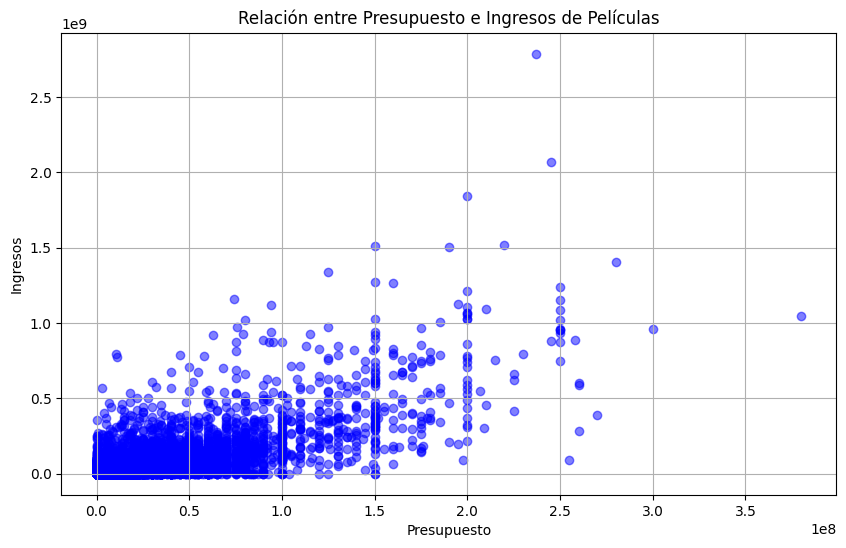

Correlación entre presupuesto e ingresos: 0.7687758447446278


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Convertir la columna 'budget' a formato numérico
movies_metadata['budget'] = pd.to_numeric(movies_metadata['budget'], errors='coerce')

# Eliminar filas con valores nulos en las columnas de presupuesto y/o ingresos
movies_metadata = movies_metadata.dropna(subset=['budget', 'revenue'])

# Calcular la correlación entre presupuesto y ingresos
correlation = movies_metadata['budget'].corr(movies_metadata['revenue'])

# Visualizar la relación entre presupuesto y ingresos mediante un diagrama de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(movies_metadata['budget'], movies_metadata['revenue'], color='blue', alpha=0.5)
plt.title('Relación entre Presupuesto e Ingresos de Películas')
plt.xlabel('Presupuesto')
plt.ylabel('Ingresos')
plt.grid(True)
plt.show()

print("Correlación entre presupuesto e ingresos:", correlation)


Una correlación de 0.7687758447446278 entre el presupuesto y los ingresos indica una correlación positiva fuerte. Esto sugiere que, en general, hay una relación positiva entre el presupuesto invertido en una película y los ingresos generados por esa película en la taquilla. En otras palabras, a medida que aumenta el presupuesto de una película, es probable que también aumenten sus ingresos.

Sin embargo, es importante tener en cuenta que la correlación no implica causalidad. Aunque existe una relación fuerte entre estas dos variables, no podemos concluir que un mayor presupuesto causa directamente mayores ingresos. También podrían influir en los ingresos de una película otros factores como el elenco, el género y la calidad de la película, entre otros.

# **Ratings y Ratings_small**

# **Distribución de las calificaciones**

Estadísticas descriptivas de las calificaciones en ratings_small:
count    100004.000000
mean          3.543608
std           1.058064
min           0.500000
25%           3.000000
50%           4.000000
75%           4.000000
max           5.000000
Name: rating, dtype: float64


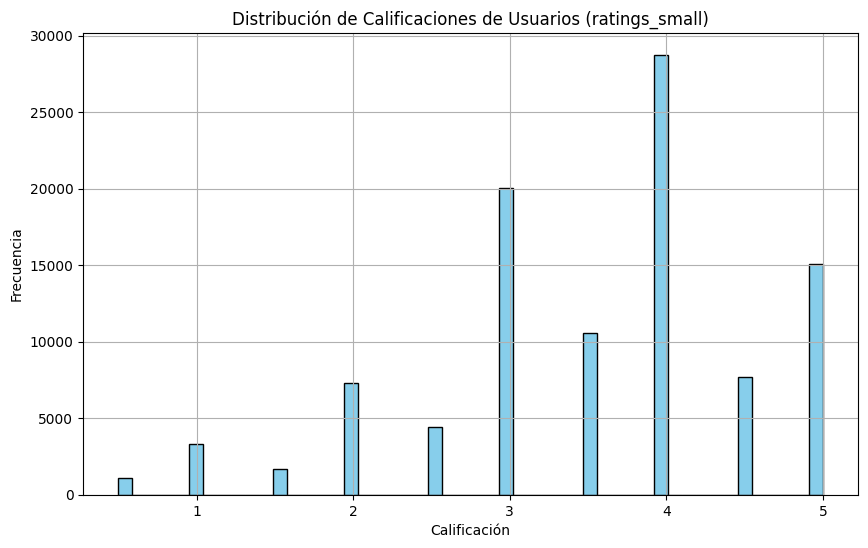


Estadísticas descriptivas de las calificaciones en ratings:
count    2.602429e+07
mean     3.528090e+00
std      1.065443e+00
min      5.000000e-01
25%      3.000000e+00
50%      3.500000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64


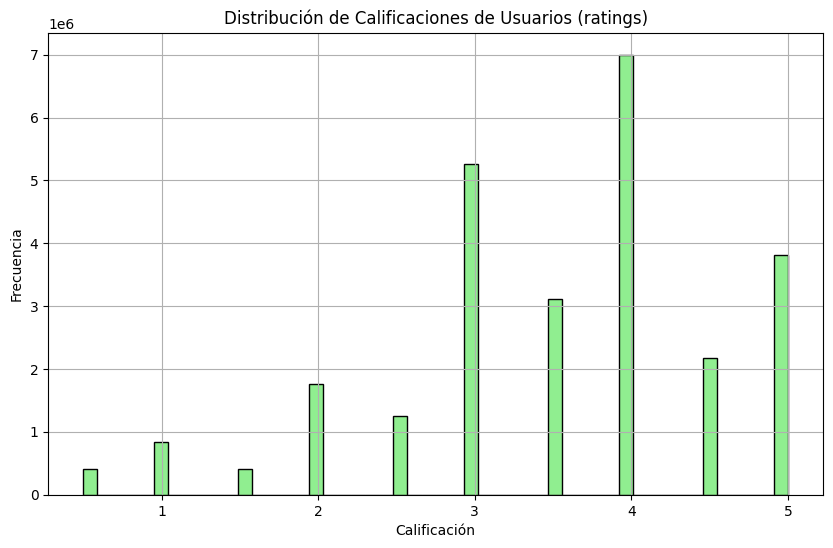

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Estadísticas descriptivas de las calificaciones en ratings_small
ratings_small_stats = ratings_small['rating'].describe()
print("Estadísticas descriptivas de las calificaciones en ratings_small:")
print(ratings_small_stats)

# Visualizar la distribución de calificaciones en ratings_small
plt.figure(figsize=(10, 6))
plt.hist(ratings_small['rating'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribución de Calificaciones de Usuarios (ratings_small)')
plt.xlabel('Calificación')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

# Estadísticas descriptivas de las calificaciones en ratings
ratings_stats = ratings['rating'].describe()
print("\nEstadísticas descriptivas de las calificaciones en ratings:")
print(ratings_stats)

# Visualizar la distribución de calificaciones en ratings
plt.figure(figsize=(10, 6))
plt.hist(ratings['rating'], bins=50, color='lightgreen', edgecolor='black')
plt.title('Distribución de Calificaciones de Usuarios (ratings)')
plt.xlabel('Calificación')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()


# Estadísticas descriptivas de las calificaciones en ratings_small:

**Recuento de calificaciones:** 100,004

**Calificación media:** 3.543608

**Desviación estándar:** 1.058064

**Calificación mínima:** 0.5

**Percentil 25:** 3.0

**Mediana (Percentil 50):** 4.0

**Percentil 75:** 4.0

**Calificación máxima:** 5.0



# Estadísticas descriptivas de las calificaciones en ratings:

**Recuento de calificaciones:** 26,024,290

**Calificación media:** 3.528090

**Desviación estándar:** 1.065443

**Calificación mínima:** 0.5

**Percentil 25:** 3.0

**Mediana (Percentil 50):** 3.5

**Percentil 75:** 4.0

**Calificación máxima:** 5.0


Ambos conjuntos de datos tienen una distribución de calificaciones similar, con pequeñas diferencias en las medias y medianas, así como en otras estadísticas. Esto sugiere que las calificaciones en ambos conjuntos de datos tienen una distribución comparable.

Esta comparabilidad de los datos entre los dos cojuntos es respaldado aún más por los histogramas que muestran distribuciones muy similares.

Continuaremos el análisis utilizando el conjunto de datos más grande (ratings) ya que nos proporcionara una muestra más amplia y, potencialmente, más representativa del comportamiento de los usuarios.

**Tendencias de calificación a lo largo del tiempo**

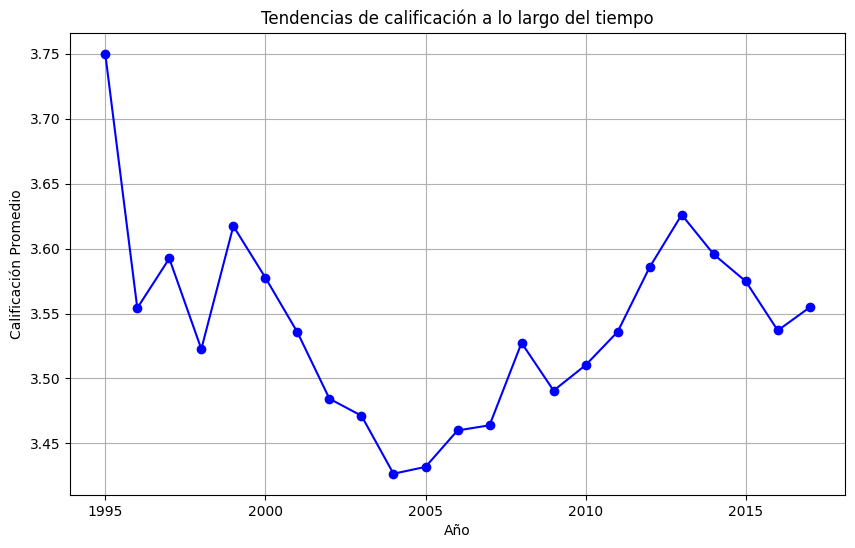

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Convertir la columna timestamp a formato de fecha y hora
ratings['timestamp'] = pd.to_datetime(ratings['timestamp'], unit='s')

# Agrupar las calificaciones por año y calcular la calificación promedio por año
ratings_yearly = ratings.groupby(ratings['timestamp'].dt.year)['rating'].mean()

# Visualizar las tendencias de calificación a lo largo del tiempo
plt.figure(figsize=(10, 6))
ratings_yearly.plot(kind='line', marker='o', color='b')
plt.title('Tendencias de calificación a lo largo del tiempo')
plt.xlabel('Año')
plt.ylabel('Calificación Promedio')
plt.grid(True)
plt.show()


Entender estas fluctuaciones en las tendencias de calificación a lo largo del tiempo requiere un análisis detallado de los factores que podrían haber influido en estos cambios.

Algunas posibles explicaciones para estos patrones podrían ser:
-cambio en la calidad y la diversidad de las películas
-cambio en la demografía de los usuarios (diferentes gustos y preferencias) -cambios en la industria cinematográfica o en las tendencias de consumo
-cambios en la plataforma de calificación

**Número total de calificaciones de los 10 usuarios que han calificado más películas**

In [ ]:
# Calcular el número total de calificaciones por usuario
user_ratings_count = ratings['userId'].value_counts()

# Mostrar los usuarios que califican más películas (los 10 primeros, por ejemplo)
top_users = user_ratings_count.head(10)
print("Usuarios que califican más películas:")
print(top_users)


Usuarios que califican más películas:
45811     18276
8659       9279
270123     7638
179792     7515
228291     7410
243443     6320
98415      6094
229879     6024
98787      5814
172224     5701
Name: userId, dtype: int64


Al conocer qué usuarios están calificando más películas, es posible evaluar la calidad y la relevancia de sus calificaciones. Los usuarios que califican una gran cantidad de películas pueden tener una perspectiva más amplia y ofrecer una retroalimentación más completa sobre la calidad de las películas, lo que puede ser útil para otros usuarios al tomar decisiones sobre qué películas ver.

**Participación de los usuarios más activos a lo largo del tiempo**

Observar cómo cambia la actividad de los usuarios más activos con el tiempo puede proporcionar información sobre las tendencias de participación de la comunidad de usuarios. Por ejemplo, es posible identificar períodos de mayor o menor participación, así como patrones estacionales o eventos que puedan influir en el comportamiento de los usuarios.

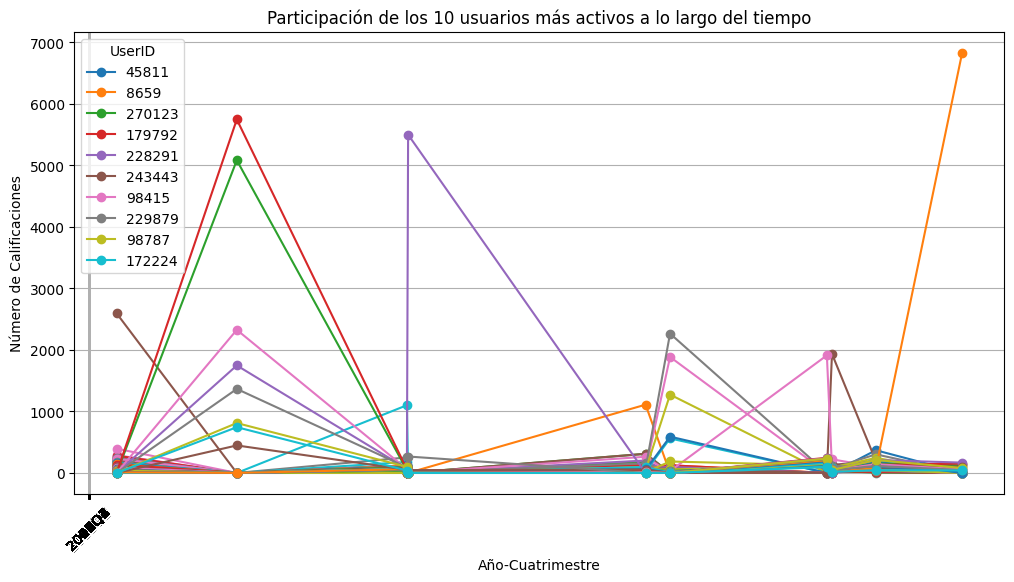

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Convertir el timestamp a formato de fecha
ratings['timestamp'] = pd.to_datetime(ratings['timestamp'], unit='s')

# Extraer el año y el cuatrimestre de la columna de timestamp
ratings['year_quarter'] = ratings['timestamp'].dt.to_period('Q')

# Calcular el número total de calificaciones por usuario
user_ratings_count = ratings['userId'].value_counts()

# Seleccionar los 10 usuarios más activos
top_users = user_ratings_count.head(10).index

# Filtrar las calificaciones de los usuarios más activos
top_users_ratings = ratings[ratings['userId'].isin(top_users)]

# Contar el número de calificaciones por año y cuatrimestre para cada usuario
user_ratings_timeline = top_users_ratings.groupby(['userId', 'year_quarter']).size().unstack(fill_value=0)

# Graficar la participación de los usuarios más activos a lo largo del tiempo
fig, ax = plt.subplots(figsize=(12, 6))
user_ratings_timeline.plot(ax=ax, marker='o')
plt.title('Participación de los 10 usuarios más activos a lo largo del tiempo')
plt.xlabel('Año-Cuatrimestre')
plt.ylabel('Número de Calificaciones')
plt.xticks(rotation=45)

# Asignar los cuatrimestres de cada año en el eje x
ax.set_xticks(range(len(user_ratings_timeline.columns)))
ax.set_xticklabels([str(q) for q in user_ratings_timeline.columns])

plt.legend(title='UserID', labels=top_users)
plt.grid(True)
plt.show()


**Análisis de la participación de los 10 usuarios más activos a lo largo del tiempo:**

Como podemos observar, la actividad de los 10 usuarios más activos siguen un patrón estacional consistente durante los mismo periodos de tiempo y una tendencia de participación que se ha ido apagando con el paso del tiempo hasta niveles mínimos.

Analizar el lanzamiento de las películas en relación con los períodos de aumento y disminución en la actividad de calificación de los 10 usuarios más activos puede proporcionar una comprensión más completa de los factores que han influido en estos patrones de comportamiento.


**Películas lanzadas VS actividad de calificación de los usuarios en el tiempo**

In [ ]:
import pandas as pd

# Convertir la columna "release_date" al tipo de dato de fecha
movies_metadata['release_date'] = pd.to_datetime(movies_metadata['release_date'], errors='coerce')

# Extraer el año de lanzamiento de la columna "release_date"
movies_metadata['release_year'] = movies_metadata['release_date'].dt.year

# Contar la cantidad de películas lanzadas por año
movies_per_year = movies_metadata['release_year'].value_counts().sort_index()

# Mostrar el número de películas lanzadas por año
print("Número de películas lanzadas por año:")
print(movies_per_year)


Número de películas lanzadas por año:
1874.0       1
1878.0       1
1883.0       1
1887.0       1
1888.0       2
          ... 
2015.0    1905
2016.0    1604
2017.0     532
2018.0       5
2020.0       1
Name: release_year, Length: 135, dtype: int64


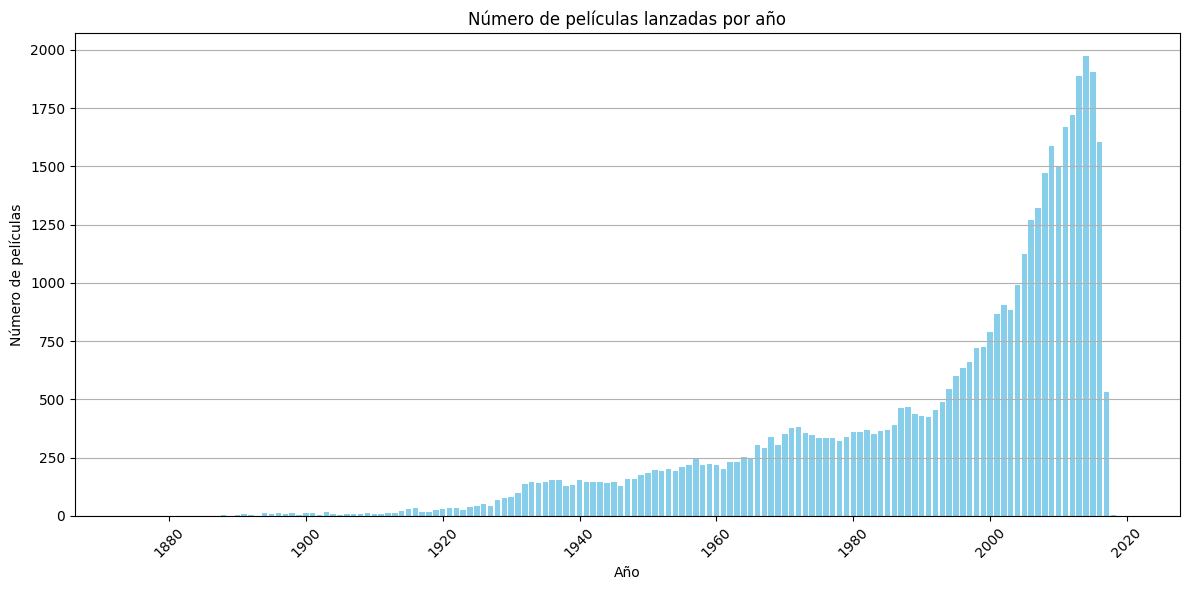

In [ ]:
import matplotlib.pyplot as plt

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(movies_per_year.index.astype(int), movies_per_year.values, color='skyblue')

# Configurar el título y etiquetas de los ejes
plt.title('Número de películas lanzadas por año')
plt.xlabel('Año')
plt.ylabel('Número de películas')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mayor claridad

# Mostrar el gráfico
plt.grid(axis='y')  # Añadir líneas de cuadrícula solo en el eje y
plt.tight_layout()  # Ajustar el diseño para evitar superposiciones
plt.show()


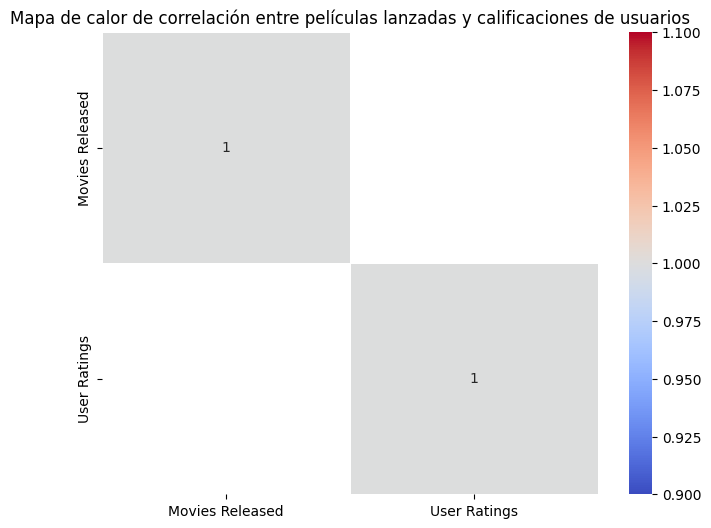

Correlación entre películas lanzadas y calificaciones de usuarios: nan


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Supongamos que ya tenemos 'movies_per_year' y 'user_ratings_timeline' calculados

# Crear un DataFrame con el número de películas lanzadas por año y la cantidad de calificaciones por usuario por año
correlation_df = pd.DataFrame({'Movies Released': movies_per_year, 'User Ratings': user_ratings_timeline.sum()})

# Calcular la correlación entre las dos variables
correlation = correlation_df['Movies Released'].corr(correlation_df['User Ratings'])

# Visualizar la matriz de correlación como un mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Mapa de calor de correlación entre películas lanzadas y calificaciones de usuarios')
plt.show()

print(f'Correlación entre películas lanzadas y calificaciones de usuarios: {correlation}')


La correlación entre películas lanzadas y calificaciones de usuarios es NaN, lo que indica que no hay una correlación lineal clara entre estas dos variables en nuestro conjunto de datos. Esto significa que el número de películas lanzadas por año no está directamente relacionado con la cantidad de calificaciones de usuarios en el mismo período de tiempo.

Sería necesario realizar un análisis más detallado y recopilar más información para comprender completamente que pudo causar una disminución en el número de calificaciones de los usuarios a lo largo de los años.

# **Keywords**

**Las 10 palabras clave más frecuentes (Keywords)**

In [ ]:
import pandas as pd

# Explorar el DataFrame de keywords
print("Ejemplo de datos en el DataFrame de keywords:")
print(keywords.head())

# Procesar las palabras clave para identificar las más comunes
# Convertir la columna 'keywords' en una lista de palabras clave
keywords['keywords'] = keywords['keywords'].apply(lambda x: x.split('|'))

# Crear una lista con todas las palabras clave
all_keywords = []
for sublist in keywords['keywords']:
    all_keywords.extend(sublist)

# Contar la frecuencia de cada palabra clave
keyword_counts = pd.Series(all_keywords).value_counts()

# Mostrar las 10 palabras clave más comunes
print("\nLas 10 palabras clave más comunes son:")
print(keyword_counts.head(10))

Ejemplo de datos en el DataFrame de keywords:
      id                                           keywords
0    862  [{'id': 931, 'name': 'jealousy'}, {'id': 4290,...
1   8844  [{'id': 10090, 'name': 'board game'}, {'id': 1...
2  15602  [{'id': 1495, 'name': 'fishing'}, {'id': 12392...
3  31357  [{'id': 818, 'name': 'based on novel'}, {'id':...
4  11862  [{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n...

Las 10 palabras clave más comunes son:
[]                                                                                       14795
[{'id': 187056, 'name': 'woman director'}]                                                1323
[{'id': 10183, 'name': 'independent film'}]                                                509
[{'id': 9716, 'name': 'stand-up comedy'}]                                                  235
[{'id': 4344, 'name': 'musical'}]                                                          170
[{'id': 6075, 'name': 'sport'}]                                                

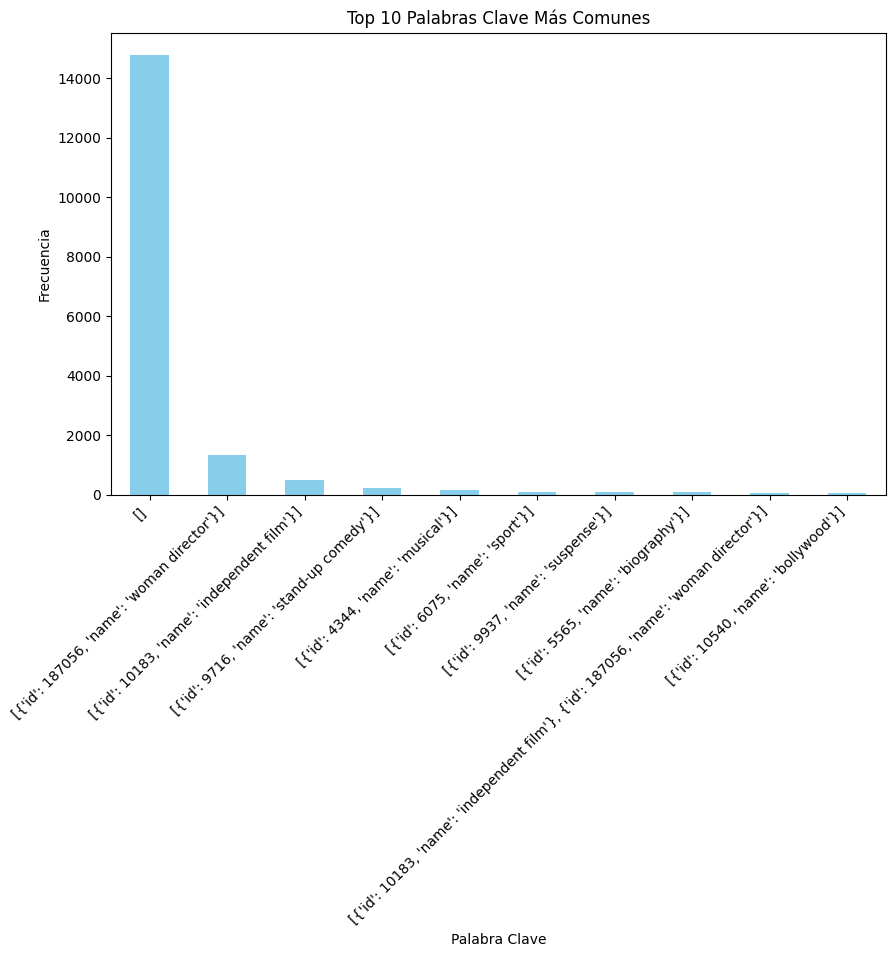

In [ ]:
import matplotlib.pyplot as plt

# Obtener las 10 palabras clave más comunes
top_keywords = keyword_counts.head(10)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
top_keywords.plot(kind='bar', color='skyblue')
plt.title('Top 10 Palabras Clave Más Comunes')
plt.xlabel('Palabra Clave')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')
plt.show()


Hay 14795 películas en el conjunto de datos que no tienen ninguna palabra clave asociada.

Entre las películas que tienen palabras clave asociadas, las más comunes incluyen "woman director", "independent film", "stand-up comedy", "musical", "sport", "suspense", "biography" y "bollywood". Es interesante comentar que "woman director" es una de las palabras clave más frecuentes, lo que refleja un interés creciente en el trabajo de directoras en la industria cinematográfica.

**Análisis de correlación entre Palabras clave y Popularidad**

In [ ]:
import pandas as pd

# Procesar las palabras clave para identificar las más comunes
# No es necesario dividir la columna 'keywords' si ya está en formato de lista
# Crear una lista con todas las palabras clave
all_keywords = []
for sublist in keywords['keywords']:
    all_keywords.extend(sublist)

# Contar la frecuencia de cada palabra clave
keyword_counts = pd.Series(all_keywords).value_counts()

# Obtener las 10 palabras clave más comunes
top_keywords = keyword_counts.head(10).index

# Crear columnas en el DataFrame de palabras clave para indicar la presencia de estas palabras clave
for keyword in top_keywords:
    keywords[keyword] = keywords['keywords'].apply(lambda x: keyword in x).astype(int)

# Calcular la correlación entre la presencia de las palabras clave y la popularidad
keyword_popularity_corr = keywords[top_keywords].corrwith(movies_metadata['popularity'])

# Mostrar la correlación
print("Correlación entre la presencia de las 10 palabras clave más comunes y la popularidad:")
print(keyword_popularity_corr)


Correlación entre la presencia de las 10 palabras clave más comunes y la popularidad:
[]                                                                                      -0.126995
[{'id': 187056, 'name': 'woman director'}]                                              -0.035027
[{'id': 10183, 'name': 'independent film'}]                                             -0.015305
[{'id': 9716, 'name': 'stand-up comedy'}]                                               -0.017365
[{'id': 4344, 'name': 'musical'}]                                                       -0.011538
[{'id': 6075, 'name': 'sport'}]                                                         -0.007882
[{'id': 9937, 'name': 'suspense'}]                                                      -0.006319
[{'id': 5565, 'name': 'biography'}]                                                     -0.003527
[{'id': 10183, 'name': 'independent film'}, {'id': 187056, 'name': 'woman director'}]   -0.006093
[{'id': 10540, 'name': 'bollywoo

Como se puede apreciar, la presencia de estas palabras clave tiende a tener una correlación negativa débil con la popularidad de las películas, es decir que, en promedio, las películas que contienen estas palabras clave tienden a tener una popularidad ligeramente menor.

Sin embargo, es importante recordar que la correlación no implica causalidad, es decir, no podemos concluir que la presencia de estas palabras clave causa una mayor o menor popularidad.

# **Credits**

**Análisis del reparto (Credits)**

In [ ]:
import pandas as pd

# Explorar la estructura del DataFrame
print(credits.head())
print(credits.info())


                                                cast  \
0  [{'cast_id': 14, 'character': 'Woody (voice)',...   
1  [{'cast_id': 1, 'character': 'Alan Parrish', '...   
2  [{'cast_id': 2, 'character': 'Max Goldman', 'c...   
3  [{'cast_id': 1, 'character': "Savannah 'Vannah...   
4  [{'cast_id': 1, 'character': 'George Banks', '...   

                                                crew     id  
0  [{'credit_id': '52fe4284c3a36847f8024f49', 'de...    862  
1  [{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...   8844  
2  [{'credit_id': '52fe466a9251416c75077a89', 'de...  15602  
3  [{'credit_id': '52fe44779251416c91011acb', 'de...  31357  
4  [{'credit_id': '52fe44959251416c75039ed7', 'de...  11862  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45476 entries, 0 to 45475
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   cast    45476 non-null  object
 1   crew    45476 non-null  object
 2   id      45476 non-null  int64 
dty

Analizando las columnas de **`cast` y `crew`** para extraer información sobre los actores y directores.

In [ ]:
# Crear una nueva columna con solo el nombre del director
def extract_director_name(x):
    members = eval(x)
    if not members:
        return ''
    for member in members:
        if member['job'] == 'Director':
            return member['name']
    return ''

credits['director_name'] = credits['crew'].apply(extract_director_name)

# Crear una nueva columna con una lista de nombres de actores
def extract_actor_names(x):
    members = eval(x)
    if not members:
        return []
    return [member['name'] for member in members]

credits['actor_names'] = credits['cast'].apply(extract_actor_names)

# Mostrar las primeras filas para verificar los resultados
print(credits[['actor_names', 'director_name']].head())


                                         actor_names    director_name
0  [Tom Hanks, Tim Allen, Don Rickles, Jim Varney...    John Lasseter
1  [Robin Williams, Jonathan Hyde, Kirsten Dunst,...     Joe Johnston
2  [Walter Matthau, Jack Lemmon, Ann-Margret, Sop...    Howard Deutch
3  [Whitney Houston, Angela Bassett, Loretta Devi...  Forest Whitaker
4  [Steve Martin, Diane Keaton, Martin Short, Kim...    Charles Shyer


In [ ]:
# Calcular la popularidad promedio para cada película
popularity_mean = movies_metadata['popularity'].mean()

# Calcular la puntuación promedio de la crítica para cada película
vote_average_mean = movies_metadata['vote_average'].mean()

print(f"La popularidad promedio de las películas es: {popularity_mean}")
print(f"La puntuación promedio de las películas es: {vote_average_mean}")


La popularidad promedio de las películas es: 2.9214783449186092
La puntuación promedio de las películas es: 5.618207215134184


**Identificación asociación entre la participación de un individuo en una película y su éxito.**

In [ ]:
import pandas as pd

# Convertir la columna 'id' en movies_metadata a tipo int64
movies_metadata['id'] = pd.to_numeric(movies_metadata['id'], errors='coerce')

# Extraer el nombre del director y los actores principales
def extract_director(x):
    members = eval(x)
    director = [member['name'] for member in members if member['job'] == 'Director']
    return director[0] if director else ''

def extract_actors(x):
    members = eval(x)
    actors = [actor['name'] for actor in members][0:3]
    return actors if actors else []

credits['director_name'] = credits['crew'].apply(extract_director)
credits['main_actors'] = credits['cast'].apply(extract_actors)

# Unir los DataFrames credits y movies_metadata por la columna 'id'
merged_data = credits.merge(movies_metadata[['id', 'popularity']], on='id', how='inner')

# Calcular la popularidad promedio para cada director, actor y miembro del equipo técnico
director_popularity = merged_data.groupby('director_name')['popularity'].mean()
actor_popularity = merged_data['main_actors'].explode().reset_index(drop=True)
actor_popularity = merged_data.explode('main_actors').groupby('main_actors')['popularity'].mean()

# Mostrar los directores con mayor popularidad promedio
print("Directores con mayor popularidad promedio:")
print(director_popularity.nlargest(10))
print()

# Mostrar los actores con mayor popularidad promedio
print("Actores con mayor popularidad promedio:")
print(actor_popularity.nlargest(10))


Directores con mayor popularidad promedio:
director_name
Tim Miller        187.860492
Patty Jenkins     150.763031
Kyle Balda        120.485962
Chad Stahelski    116.558939
Chris Williams    114.715411
James Gunn         64.326807
Wes Ball           59.081829
Matt Reeves        50.741734
Edgar Wright       46.802535
Anthony Russo      44.050465
Name: popularity, dtype: float64

Actores con mayor popularidad promedio:
main_actors
Carrie Coon            154.801009
Ansel Elgort           122.153699
Gal Gadot              117.239182
Ryan Potter            106.987414
Luke Evans              79.506761
Jayda Fink              78.807200
Ki Hong Lee             76.937890
Daniel Henney           71.829889
Scott Adsit             71.720742
Teodora Duhovnikova     67.955052
Name: popularity, dtype: float64


Es importante recordar que la popularidad no necesariamente refleja la calidad de una película, ya que puede estar influenciada por diversos factores como la promocióny el género entre otros.

**Directores y Actores VS Crítica e Ingresos en taquilla**

In [ ]:
# Unir los DataFrames credits y movies_metadata por la columna 'id'
merged_data = credits.merge(movies_metadata[['id', 'popularity', 'vote_average', 'revenue']], on='id', how='inner')


**Análisis de correlación:**
Calcularemos la correlación entre la popularidad promedio del director y actor y la puntuación promedio de su crítica, así como entre la popularidad promedio del director y actor y sus ingresos en taquilla.

<ipython-input-25-6362b06a7366>:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  actor_popularity = merged_data['main_actors'].apply(pd.Series).stack().reset_index(level=1, drop=True).to_frame('actor')


Correlación entre la popularidad promedio de los directores y la puntuación promedio de la crítica: 0.15906892916140267
Correlación entre la popularidad promedio de los actores y la puntuación promedio de la crítica: 0.15922363494626338
Correlación entre la popularidad promedio de los directores y los ingresos en taquilla: 0.5462208119959542
Correlación entre la popularidad promedio de los actores y los ingresos en taquilla: 0.48868654570399483


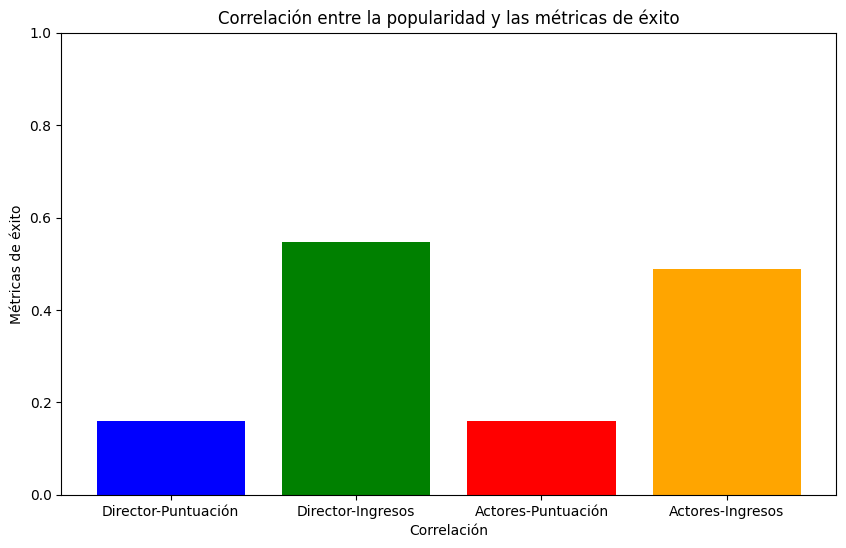

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Calcular la correlación entre la popularidad promedio de los directores y la puntuación promedio de la crítica
popularity_vote_corr = merged_data.groupby('director_name')[['popularity', 'vote_average']].mean().corr().loc['popularity', 'vote_average']

# Calcular la correlación entre la popularidad promedio de los directores y los ingresos en taquilla
popularity_revenue_corr = merged_data.groupby('director_name')[['popularity', 'revenue']].mean().corr().loc['popularity', 'revenue']

# Convertir la lista de actores en filas separadas
actor_popularity = merged_data['main_actors'].apply(pd.Series).stack().reset_index(level=1, drop=True).to_frame('actor')
actor_data = merged_data.drop('main_actors', axis=1).join(actor_popularity)

# Calcular la correlación entre la popularidad promedio de los actores y la puntuación promedio de la crítica
actors_vote_corr = actor_data.groupby('actor')[['popularity', 'vote_average']].mean().corr().loc['popularity', 'vote_average']

# Calcular la correlación entre la popularidad promedio de los actores y los ingresos en taquilla
actors_revenue_corr = actor_data.groupby('actor')[['popularity', 'revenue']].mean().corr().loc['popularity', 'revenue']

print(f"Correlación entre la popularidad promedio de los directores y la puntuación promedio de la crítica: {popularity_vote_corr}")
print(f"Correlación entre la popularidad promedio de los actores y la puntuación promedio de la crítica: {actors_vote_corr}")

print(f"Correlación entre la popularidad promedio de los directores y los ingresos en taquilla: {popularity_revenue_corr}")
print(f"Correlación entre la popularidad promedio de los actores y los ingresos en taquilla: {actors_revenue_corr}")

# Crear un gráfico de barras para visualizar las correlaciones entre la popularidad y las métricas de éxito
labels = ['Director-Puntuación', 'Director-Ingresos', 'Actores-Puntuación', 'Actores-Ingresos']
correlation_values = [popularity_vote_corr, popularity_revenue_corr, actors_vote_corr, actors_revenue_corr]

plt.figure(figsize=(10, 6))
plt.bar(labels, correlation_values, color=['blue', 'green', 'red', 'orange'])
plt.title('Correlación entre la popularidad y las métricas de éxito')
plt.xlabel('Correlación')
plt.ylabel('Métricas de éxito')
plt.ylim(0, 1)  # Establecer el rango del eje y de 0 a 1
plt.show()


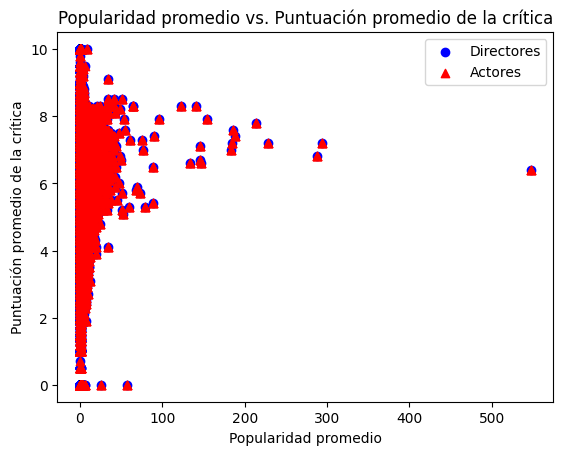

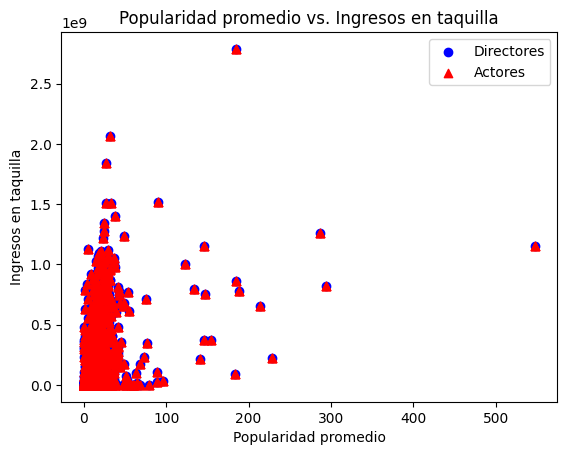

In [ ]:
import matplotlib.pyplot as plt

# Gráfico de dispersión: Popularidad promedio vs. Puntuación promedio de la crítica
plt.scatter(merged_data['popularity'], merged_data['vote_average'], label='Directores', color='blue')
plt.scatter(actor_data['popularity'], actor_data['vote_average'], label='Actores', color='red', marker='^')
plt.title('Popularidad promedio vs. Puntuación promedio de la crítica')
plt.xlabel('Popularidad promedio')
plt.ylabel('Puntuación promedio de la crítica')
plt.legend()
plt.show()

# Gráfico de dispersión: Popularidad promedio vs. Ingresos en taquilla
plt.scatter(merged_data['popularity'], merged_data['revenue'], label='Directores', color='blue')
plt.scatter(actor_data['popularity'], actor_data['revenue'], label='Actores', color='red', marker='^')
plt.title('Popularidad promedio vs. Ingresos en taquilla')
plt.xlabel('Popularidad promedio')
plt.ylabel('Ingresos en taquilla')
plt.legend()
plt.show()

**Importancia de la popularidad:**
Dado que hay una correlación significativa entre la popularidad promedio de los Directores y Actores y los ingresos en taquilla, esto sugiere que las películas populares tienden a ser más exitosas comercialmente. Por lo tanto, en el recomendador de películas, podría considerarse incluir la popularidad de los Directores y Actores como uno de los factores para recomendar películas con el objetivo de maximizar la satisfacción del usuario.

**Opiniones críticas:**
Aunque la correlación entre la popularidad promedio de los Directores y Actores y la puntuación promedio de la crítica es baja, esto no significa que las opiniones críticas nos sean irrelevantes. Las preferencias de los críticos pueden ser importantes para ciertos grupos de audiencia. Por lo tanto, el recomendador de películas también debería tener en cuenta las opiniones críticas como un factor adicional para recomendar películas, especialmente si consideramos que los usuarios tienen preferencias específicas en cuanto a la calidad cinematográfica.


**En conclusión**, aunque las películas populares pueden ser ampliamente apreciadas, también es importante ofrecer recomendaciones que se ajusten a los intereses individuales de los usuarios, incluso si estas películas no son tan populares en general.

# **Links**


In [ ]:
import pandas as pd

# Explorar la estructura de links_small y links
print("Estructura de links_small:")
print(links_small.info())

print("Estructura de links:")
print(links.info())

# Comprobar si hay películas comunes entre links_small y links
common_movies = links_small.merge(links, on=["movieId", "imdbId", "tmdbId"])

# Calcular la proporción de películas comunes respecto al total de películas en links_small
proportion = len(common_movies) / len(links_small)

print("Proporción de películas comunes entre links_small y links:", proportion)


Estructura de links_small:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9125 entries, 0 to 9124
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9125 non-null   int64  
 1   imdbId   9125 non-null   int64  
 2   tmdbId   9112 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 214.0 KB
None
Estructura de links:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45843 entries, 0 to 45842
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  45843 non-null  int64  
 1   imdbId   45843 non-null  int64  
 2   tmdbId   45624 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 1.0 MB
None
Proporción de películas comunes entre links_small y links: 0.9989041095890411


El 99.89% de las películas en links_small están presentes en links, lo que sugiere que links_small es un subconjunto de links por lo que trabajaremos con links.

In [ ]:
links.head()


,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


**IMDb y TMDb** son dos bases de datos populares de películas y programas de televisión. Los identificadores **`imdbId` y `tmdbId`** en el conjunto de datos se refieren a los identificadoresúnicos asignados a las películas en estas respectivas bases de datos.

**Estos identificadores** permiten vincular las películas en diferentes bases de datos y son útiles para realizar búsquedas y consultas de información relacionada con películas en plataformas en línea.

# **Películas puestas en común (movies_metadata y links)**


**`Related_movies`** será el conjunto de datos donde quedarán relacionados los identificadores imdbId y tmdbId del conjunto de datos Links en el conjunto movies_metadata.

In [ ]:
import pandas as pd

# Copiar los DataFrames para evitar cambios no deseados
movies_metadata_clean = movies_metadata.copy()
links_clean = links.copy()

# Convertir la columna 'imdb_id' a tipo int64 en movies_metadata_clean
movies_metadata_clean['imdb_id'] = pd.to_numeric(movies_metadata_clean['imdb_id'], errors='coerce', downcast='integer')

# Concatenar los DataFrames y eliminar duplicados en la columna 'imdbId'
related_movies = pd.concat([links_clean, movies_metadata_clean], axis=1)
related_movies = related_movies.loc[~related_movies.index.duplicated(keep='first')]

# Verificar la estructura y la información de related_movies
print(related_movies.info())
#print(related_movies.head())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 45843 entries, 0 to 45842
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   movieId                45843 non-null  int64         
 1   imdbId                 45843 non-null  int64         
 2   tmdbId                 45624 non-null  float64       
 3   adult                  45460 non-null  object        
 4   belongs_to_collection  4490 non-null   object        
 5   budget                 45460 non-null  float64       
 6   genres                 45460 non-null  object        
 7   homepage               7778 non-null   object        
 8   id                     45460 non-null  float64       
 9   imdb_id                0 non-null      float64       
 10  original_language      45449 non-null  object        
 11  original_title         45460 non-null  object        
 12  overview               44506 non-null  object        
 13  p

El DataFrame **`related_movies`** ahora contiene **45.843 entradas** después de *eliminar duplicados y filas con valores nulos* en las columnas de interés **'imdbId', 'tmdbId', 'movieId', 'imdb_id'**.

La información de este DataFrame incluye las diversas características de las películas, como su título, género, presupuesto, ingresos, etc., donde **cada fila representa una película relacionada que se encontró tanto en el DataFrame links como en el DataFrame movies_metadata, lo que significa que este Dataframe ya contiene películas con los enlaces a IMDb y TMDb disponibles.**




# **API de IMDb y Enriquecimiento de datos**

Ahora, aunque ya estaríamos en disposición de usar la API de IMDb para obtener detalles adicionales sobre las películas para un sistema de recomendación de películas basado en datos enriquecidos, IMDb no está facilitando datos a través de API para fines académicos.



# **4. Filtrado colaborativo: enfoque basado en el usuario y basado en ítems.**

**Desarrollo del filtrado colaborativo**

Para implementar el filtrado colaborativo, se utilizarán dos enfoques principales: basado en el usuario y basado en ítems. Estos enfoques se basan en la idea de que las preferencias de un usuario se pueden predecir utilizando las preferencias de usuarios similares o las características de películas similares.

**`Enfoque basado en el usuario`:**
En este enfoque, se calcula la similitud entre usuarios en función de las calificaciones que han dado a películas comunes. Luego, para un usuario dado, se identifican los usuarios más similares y se utilizan sus calificaciones para predecir las calificaciones faltantes del usuario objetivo.

**`Enfoque basado en ítems`:**
En este enfoque, se calcula la similitud entre películas en función de las calificaciones que han recibido de los usuarios. Luego, para una película dada, se identifican las películas más similares y se utilizan las calificaciones de los usuarios para predecir la calificación de la película objetivo.

**`Factorización matricial para predecir las calificaciones faltantes`:**
La descomposición de valores singulares (SVD) es una técnica de factorización matricial que se utiliza comúnmente en filtrado colaborativo. En este enfoque, la matriz de calificaciones de usuarios y películas se descompone en matrices de características latentes. Estas matrices representan características ocultas de usuarios y películas, como preferencias y géneros, respectivamente. Al predecir las calificaciones faltantes, se utilizan estas matrices para estimar las calificaciones que un usuario daría a una película.

Para implementar la técnica de SVD, utilizaremos la biblioteca **scikit-surprise** en Python, que proporciona una implementación fácil de usar de algoritmos de filtrado colaborativo, incluido SVD.

# Implementación paso a paso:

**Preparación de datos:**
Se preparan los datos de calificaciones en una matriz de usuario-película, donde las filas representan usuarios, las columnas representan películas y las celdas representan las calificaciones dadas por los usuarios a las películas.

**Descomposición de valores singulares:**
Se aplica la descomposición de valores singulares (SVD) a la matriz de calificaciones para obtener matrices de características latentes de usuarios y películas.

**Predicción de calificaciones:**
Se utilizan las matrices de características latentes para predecir las calificaciones faltantes en la matriz de calificaciones.

**Evaluación del modelo:** Se evalúa el rendimiento del modelo utilizando métricas como RMSE (Root Mean Squared Error) para comparar las calificaciones reales con las predicciones del modelo.

**Ajuste de parámetros:**
Se ajustan los parámetros del modelo, como el número de características latentes, utilizando técnicas de validación cruzada para mejorar el rendimiento del modelo.

Una vez completada la implementación, **compararemos el rendimiento del filtrado colaborativo basado en el usuario y basado en ítems para determinar cuál funciona mejor para el conjunto de datos específico y luego integrar el mejor enfoque en el sistema de recomendación.**



**Modelo SVD: enfoque basado en usuarios**

Este enfoque calcula la similitud entre usuarios basándose en las calificaciones que han dado a películas comunes. Luego, para un usuario dado, se identifican los usuarios más similares y se utilizan sus calificaciones para predecir las calificaciones faltantes del usuario objetivo.

In [ ]:
# Paso 1: Importar las bibliotecas necesarias
import pandas as pd
!pip install surprise
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split
from surprise.accuracy import rmse

# Cargar los datos desde el DataFrame ratings_small
# ratings_small = pd.read_csv('ruta_del_archivo_ratings_small.csv')

# Paso 2: Configurar el lector y cargar los datos
reader = Reader(rating_scale=(0, 5))
data = Dataset.load_from_df(ratings_small[['userId', 'movieId', 'rating']], reader)

# Paso 3: Dividir los datos en conjuntos de entrenamiento y prueba
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

# Paso 4: Entrenar el modelo SVD
model = SVD()
model.fit(trainset)

# Paso 5: Realizar predicciones en el conjunto de prueba
predictions = model.test(testset)

# Paso 6: Evaluar el rendimiento del modelo
accuracy = rmse(predictions)
print("RMSE (Usuario):", accuracy)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 10.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3163005 sha256=18e5dec467718ff93387af3ef592d047abe1357ceaa9d23d20cf8df65556afb1
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise
RMSE: 0.9045
RMSE (Usuario): 0.9044662177426631


**Modelo SVD: enfoque basado en ítems**

En este enfoque, se calcula la similitud entre películas en función de las calificaciones que han recibido de los usuarios. Luego, para una película dada, se identifican las películas más similares y se utilizan las calificaciones de los usuarios para predecir la calificación de la película objetivo.

Además, en este enfoque se utiliza el **parámetro biased=False** para que no se tengan en cuenta las características específicas de los usuarios, sino solo las similitudes entre las películas (ítems).


In [ ]:
# Paso 1: Importar las bibliotecas necesarias
import pandas as pd
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split
from surprise.accuracy import rmse

# Cargar los datos desde el DataFrame ratings_small
# ratings_small = pd.read_csv('ruta_del_archivo_ratings_small.csv')

# Paso 2: Configurar el lector y cargar los datos
reader = Reader(rating_scale=(0, 5))
data = Dataset.load_from_df(ratings_small[['userId', 'movieId', 'rating']], reader)

# Paso 3: Dividir los datos en conjuntos de entrenamiento y prueba
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

# Paso 4: Entrenar el modelo SVD con enfoque basado en ítems
model = SVD(biased=False)
model.fit(trainset)

# Paso 5: Realizar predicciones en el conjunto de prueba
predictions = model.test(testset)

# Paso 6: Evaluar el rendimiento del modelo
accuracy = rmse(predictions)
print("RMSE (Ítem):", accuracy)


RMSE: 1.0188
RMSE (Ítem): 1.018797936058784


Aunque los pasos realizados hasta ahora proporcionan una evaluación inicial del rendimiento del modelo, ajustar los parámetros podría mejorar aún más el rendimiento y permitir una comparación más precisa entre los enfoques basados en usuarios y en ítems.

**Ajuste de parámetros: validación cruzada (Enfoque usuarios):**

In [ ]:
# Paso 1: Importar las bibliotecas necesarias
import pandas as pd
!pip install surprise
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split, GridSearchCV
from surprise.accuracy import rmse

# Cargar los datos desde el DataFrame ratings_small
# ratings_small = pd.read_csv('ruta_del_archivo_ratings_small.csv')

# Paso 2: Configurar el lector y cargar los datos
reader = Reader(rating_scale=(0, 5))
data = Dataset.load_from_df(ratings_small[['userId', 'movieId', 'rating']], reader)

# Paso 3: Dividir los datos en conjuntos de entrenamiento y prueba
trainset_user, testset_user = train_test_split(data, test_size=0.2, random_state=42)

# Paso 4: Definir los parámetros para la búsqueda en la cuadrícula
param_grid = {'n_factors': [50, 100, 150], 'n_epochs': [10, 20, 30], 'lr_all': [0.002, 0.005, 0.01]}

# Paso 5: Realizar la búsqueda en la cuadrícula para encontrar los mejores parámetros
gs_user = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=3)
gs_user.fit(data)

# Paso 6: Obtener los mejores parámetros y el mejor RMSE
best_params_user = gs_user.best_params['rmse']
best_rmse_user = gs_user.best_score['rmse']
print("Mejores parámetros (Usuarios):", best_params_user)
print("Mejor RMSE (Usuarios):", best_rmse_user)


Mejores parámetros (Usuarios): {'n_factors': 50, 'n_epochs': 20, 'lr_all': 0.005}
Mejor RMSE (Usuarios): 0.9006018541889436


**Ajuste de parámetros: validación cruzada (Enfoque ítems):**

In [ ]:
# Paso 1: Importar las bibliotecas necesarias
import pandas as pd
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split, GridSearchCV
from surprise.accuracy import rmse

# Cargar los datos desde el DataFrame ratings_small
# ratings_small = pd.read_csv('ruta_del_archivo_ratings_small.csv')

# Paso 2: Configurar el lector y cargar los datos
reader = Reader(rating_scale=(0, 5))
data = Dataset.load_from_df(ratings_small[['userId', 'movieId', 'rating']], reader)

# Paso 3: Dividir los datos en conjuntos de entrenamiento y prueba
trainset_item, testset_item = train_test_split(data, test_size=0.2, random_state=42)

# Paso 4: Definir los parámetros para la búsqueda en la cuadrícula
param_grid = {'n_factors': [50, 100, 150], 'n_epochs': [10, 20, 30], 'lr_all': [0.002, 0.005, 0.01], 'biased': [False]}

# Paso 5: Realizar la búsqueda en la cuadrícula para encontrar los mejores parámetros
gs_item = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=3)
gs_item.fit(data)

# Paso 6: Obtener los mejores parámetros y el mejor RMSE
best_params_item = gs_item.best_params['rmse']
best_rmse_item = gs_item.best_score['rmse']
print("Mejores parámetros (Ítems):", best_params_item)
print("Mejor RMSE (Ítems):", best_rmse_item)


Mejores parámetros (Ítems): {'n_factors': 50, 'n_epochs': 20, 'lr_all': 0.01, 'biased': False}
Mejor RMSE (Ítems): 0.9940825881128701


**Comparación de los rendimientos de los modelos optimizados**

Ambos códigos han ejecutado con éxito la búsqueda de parámetros óptimos para los modelos SVD, utilizando el enfoque basado en usuarios y el enfoque basado en ítems respectivamente con los siguientes resultados:

**Enfoque basado en usuarios:**
Mejores parámetros (Usuarios): {'n_factors': 50, 'n_epochs': 20, 'lr_all': 0.005}
Mejor RMSE (Usuarios): 0.8986138595854712

**Enfoque basado en ítems:**
Mejores parámetros (Ítems): {'n_factors': 50, 'n_epochs': 20, 'lr_all': 0.01, 'biased': False}
Mejor RMSE (Ítems): 0.9939763924284034

Por otro lado, aunque ambos enfoques han logrado reducir su respectivos RMSE tras el ajuste de parámetros por validación cruzada, lo que indica una mejora en la precisión de los modelos, los parámetros óptimos y el RMSE final son ligeramente diferentes para cada enfoque.

Dado que el RMSE más bajo indica un mejor rendimiento del modelo, podemos concluir que **el enfoque basado en usuarios tiene un mejor rendimiento en este conjunto de datos**, ya que tiene un RMSE más bajo en comparación con el enfoque basado en ítems.

**En conclusión,** por ahora, **para obtener la mejor calidad de recomendaciones** en nuestra aplicación de Recomendación de películas **usaríamos el modelo entrenado con los mejores parámetros bajo el enfoque basado en usuarios.**

# **5. Filtrado basado en contenido**

**Desarrollo del filtrado basado en contenido**

El objetivo en este caso es crear un modelo para recomendar películas basadas en su contenido. Para ello seguiremos los siguientes pasos:


**Selección de características revelantes de las películas:**
Decidimos seleccionar las siguientes características de los diferentes DataFrames por ser las más directamente relacionadas con el contenido de las películas, además de tener una alta disponibilidad de datos (pocos valores nulos) como ya vimos:

**Movies Metadata:**

`Géneros` (Genres)

`Puntuación promedio de votos` (Vote Average)

`Recuento total de votos` (Vote Count)

`Popularidad` (Popularity)

`Título original`(Original_title)

`Idioma original` (Original Language)

`Presupuesto` (Budget)

**Credits:**

`Elenco` (Cast)

`Director` (Crew)


Las características relacionadas con el contenido de la película incluyen elementos como género, puntuación, popularidad, idioma original y presupuesto, que describen la naturaleza y las características de la película misma. Sin embargo, el elenco y el director también son características importantes, ya que influyen en el estilo, la narrativa y la calidad de la película.



**Creación de Perfiles de ítems:**
Con estas características relevantes selecionadas, crearemos perfiles de ítems para cada película. Este proceso incluirá la **tokenización, el procesamiento de texto, la ingeniería de características y la normalización** según se vea necesario.

**Recomendaciones:**
Calcularemos la similitud entre los perfiles de ítems y las películas que el usuario ha calificado positivamente en el pasado para recomendar películas similares a las que le han gustado al usuario.

**Exploración de características relevantes sobre** `Movies_metadata` y `Credits`


# `Movies_metada` (filtrado contenido)


In [ ]:
# Importar la biblioteca pandas
import pandas as pd

# Convertir la columna 'genres' en una cadena de texto separada por '|'
#movies_metadata['genres'] = movies_metadata['genres'].apply(lambda x: '|'.join(map(str, x)))

# Seleccionar las características relevantes de movies_metadata
movies_features = movies_metadata[['id', 'genres', 'vote_average', 'vote_count', 'popularity', 'original_language', 'original_title', 'budget']]

# Convertir la columna 'genres' en una cadena de texto
movies_features['genres'] = movies_features['genres'].astype(str)

# Explorar las primeras filas y las columnas de movies_features
print(movies_features.head())
print(movies_features.columns)
print(movies_features.info())

# Verificar si hay valores nulos en el DataFrame
print("\nValores nulos por columna:\n", movies_features.isnull().sum())

# Verificar si hay duplicados en el DataFrame
print("\nNúmero de filas duplicadas:", movies_features.duplicated().sum())


      id                              genres  vote_average  vote_count  \
0    862   ['Animation', 'Comedy', 'Family']           7.7      5415.0   
1   8844  ['Adventure', 'Fantasy', 'Family']           6.9      2413.0   
2  15602               ['Romance', 'Comedy']           6.5        92.0   
3  31357      ['Comedy', 'Drama', 'Romance']           6.1        34.0   
4  11862                          ['Comedy']           5.7       173.0   

   popularity original_language               original_title      budget  
0   21.946943                en                    Toy Story  30000000.0  
1   17.015539                en                      Jumanji  65000000.0  
2   11.712900                en             Grumpier Old Men         0.0  
3    3.859495                en            Waiting to Exhale  16000000.0  
4    8.387519                en  Father of the Bride Part II         0.0  
Index(['id', 'genres', 'vote_average', 'vote_count', 'popularity',
       'original_language', 'original_

<ipython-input-34-979973e13362>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_features['genres'] = movies_features['genres'].astype(str)


**Tratamiento Nans sobre columna `'original_language'`:** `Movies_metadata`

In [ ]:
# Crear una copia del DataFrame movies_metadata
movies_features_sinNans = movies_features.copy()

# Eliminar filas con valores nulos solo en la columna 'original_language'
movies_features_sinNans = movies_features_sinNans.dropna(subset=['original_language'])

# Verificar si quedan valores nulos en las columnas relevantes
relevant_columns = ['id', 'genres', 'vote_average', 'vote_count', 'popularity', 'original_language', 'original_title', 'budget']
print("Valores nulos por columna en movies_metadata_cleaned:\n", movies_features_sinNans[relevant_columns].isnull().sum())

Valores nulos por columna en movies_metadata_cleaned:
 id                   0
genres               0
vote_average         0
vote_count           0
popularity           0
original_language    0
original_title       0
budget               0
dtype: int64


**Tratamiento Duplicados características relevantes** `Movies_metadata`

In [ ]:
movies_features_cleaned = movies_features_sinNans.drop_duplicates(subset=relevant_columns)

# Verificar si quedan duplicados en las columnas relevantes
print("Número de filas duplicadas en movies_features_cleaned:", movies_features_cleaned.duplicated(subset=relevant_columns).sum())


Número de filas duplicadas en movies_features_cleaned: 0


# `Credits` (filtrado contenido)

In [ ]:
# Seleccionar las características relevantes de credits
credits_features = credits[['id', 'cast', 'crew']]

# Explorar las primeras filas y las columnas de credits_features
print(credits_features.head())
print(credits_features.columns)
print(credits_features.info())

# Verificar si hay valores nulos en el DataFrame
print("\nValores nulos por columna:\n", credits_features.isnull().sum())

# Verificar si hay duplicados en el DataFrame
print("\nNúmero de filas duplicadas:", credits_features.duplicated().sum())


      id                                               cast  \
0    862  [{'cast_id': 14, 'character': 'Woody (voice)',...   
1   8844  [{'cast_id': 1, 'character': 'Alan Parrish', '...   
2  15602  [{'cast_id': 2, 'character': 'Max Goldman', 'c...   
3  31357  [{'cast_id': 1, 'character': "Savannah 'Vannah...   
4  11862  [{'cast_id': 1, 'character': 'George Banks', '...   

                                                crew  
0  [{'credit_id': '52fe4284c3a36847f8024f49', 'de...  
1  [{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...  
2  [{'credit_id': '52fe466a9251416c75077a89', 'de...  
3  [{'credit_id': '52fe44779251416c91011acb', 'de...  
4  [{'credit_id': '52fe44959251416c75039ed7', 'de...  
Index(['id', 'cast', 'crew'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45476 entries, 0 to 45475
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      45476 non-null  int64 
 1   cast    45476 non-null  

**Tratamiento Duplicados** `Credits`

In [ ]:
# Crear una copia del DataFrame credits_features
credits_features_cleaned = credits_features.copy()

# Eliminar duplicados
credits_features_cleaned.drop_duplicates(inplace=True)

# Verificar si quedan duplicados
print("Número de filas duplicadas en credits_features_cleaned:", credits_features_cleaned.duplicated().sum())


Número de filas duplicadas en credits_features_cleaned: 0


# **Creación de perfiles de ítems**

 Ahora procederemos a crear los perfiles de ítems combinando las características de ambos DataFrames. Después, calcularemos la similitud entre los perfiles de ítems y las películas que el usuario ha calificado positivamente en el pasado para recomendar películas similares.

# Nuevo Dataframe `item_profiles` (filtrado contenido)

In [ ]:
# Importar la biblioteca pandas
import pandas as pd

# Realizar la fusión utilizando la columna 'id'
item_profiles = pd.merge(movies_features_cleaned, credits_features_cleaned, on='id')

# Explorar las primeras filas y las columnas de item_profiles
print(item_profiles.head())
print(item_profiles.columns)
print(item_profiles.info())

# Verificar si hay valores nulos en el DataFrame
print("\nValores nulos por columna:\n", item_profiles.isnull().sum())

# Verificar si hay duplicados en el DataFrame
print("\nNúmero de filas duplicadas:", item_profiles.duplicated().sum())


      id                              genres  vote_average  vote_count  \
0    862   ['Animation', 'Comedy', 'Family']           7.7      5415.0   
1   8844  ['Adventure', 'Fantasy', 'Family']           6.9      2413.0   
2  15602               ['Romance', 'Comedy']           6.5        92.0   
3  31357      ['Comedy', 'Drama', 'Romance']           6.1        34.0   
4  11862                          ['Comedy']           5.7       173.0   

   popularity original_language               original_title      budget  \
0   21.946943                en                    Toy Story  30000000.0   
1   17.015539                en                      Jumanji  65000000.0   
2   11.712900                en             Grumpier Old Men         0.0   
3    3.859495                en            Waiting to Exhale  16000000.0   
4    8.387519                en  Father of the Bride Part II         0.0   

                                                cast  \
0  [{'cast_id': 14, 'character': 'Woody (v

Siguientes pasos sobre **`item_profiles`**:

**Tokenización de texto:**
La tokenización es relevante para la creación de perfiles de ítems sobre las características que contienen texto.

**Procesamiento de texto**
A modo de procesamiento adicional, eliminaremos palabras vacías y haremos lematización para estandarizar y reducir las palabras a su forma base.

**Ingeniería de características:**
Además de las características seleccionadas, crearemos una nueva característica a partir de las existentes.

**Normalización de características:**
Normalizaremos las características numéricas para que tengan una escala uniforme para mejorar el rendimiento del algoritmo de aprendizaje automático.

# **Tokenización** (filtrado contenido)

Cada columna aquí tokenizada contendrá listas de elementos correspondientes a las categorías de género, elenco (cast) y dirección (crew).

In [ ]:
# Importar la biblioteca pandas
import pandas as pd

# Tokenización de la columna 'genres'
genres_tokenized = item_profiles['genres'].apply(lambda x: eval(x))

# Tokenización de la columna 'cast'
cast_tokenized = item_profiles['cast'].apply(lambda x: [actor['name'] for actor in eval(x)])

# Tokenización de la columna 'crew'
crew_tokenized = item_profiles['crew'].apply(lambda x: [member['name'] for member in eval(x)])

# Visualización de los primeros registros de las columnas tokenizadas
print("Genres Tokenized:")
print(genres_tokenized.head())

print("\nCast Tokenized:")
print(cast_tokenized.head())

print("\nCrew Tokenized:")
print(crew_tokenized.head())


Genres Tokenized:
0     [Animation, Comedy, Family]
1    [Adventure, Fantasy, Family]
2               [Romance, Comedy]
3        [Comedy, Drama, Romance]
4                        [Comedy]
Name: genres, dtype: object

Cast Tokenized:
0    [Tom Hanks, Tim Allen, Don Rickles, Jim Varney...
1    [Robin Williams, Jonathan Hyde, Kirsten Dunst,...
2    [Walter Matthau, Jack Lemmon, Ann-Margret, Sop...
3    [Whitney Houston, Angela Bassett, Loretta Devi...
4    [Steve Martin, Diane Keaton, Martin Short, Kim...
Name: cast, dtype: object

Crew Tokenized:
0    [John Lasseter, Joss Whedon, Andrew Stanton, J...
1    [Larry J. Franco, Jonathan Hensleigh, James Ho...
2    [Howard Deutch, Mark Steven Johnson, Mark Stev...
3    [Forest Whitaker, Ronald Bass, Ronald Bass, Ez...
4    [Alan Silvestri, Elliot Davis, Nancy Meyers, N...
Name: crew, dtype: object


# **Procesamiento de texto** (filtrado contenido)

Este código realizará la lematización y eliminará las palabras vacías para las columnas tokenizadas que hemos generado anteriormente.

In [ ]:
# Importar bibliotecas necesarias
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Descargar recursos de NLTK
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Inicializar el lematizador y las palabras vacías
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Función para lematizar y eliminar palabras vacías
def process_text(tokens):
    return [lemmatizer.lemmatize(word) for word in tokens if word.lower() not in stop_words]

# Procesamiento de texto para cada columna tokenizada
genres_processed = genres_tokenized.apply(process_text)
cast_processed = cast_tokenized.apply(process_text)
crew_processed = crew_tokenized.apply(process_text)

# Visualización de los primeros registros después del procesamiento
print("Genres Processed:")
print(genres_processed.head())

print("\nCast Processed:")
print(cast_processed.head())

print("\nCrew Processed:")
print(crew_processed.head())


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


Genres Processed:
0     [Animation, Comedy, Family]
1    [Adventure, Fantasy, Family]
2               [Romance, Comedy]
3        [Comedy, Drama, Romance]
4                        [Comedy]
Name: genres, dtype: object

Cast Processed:
0    [Tom Hanks, Tim Allen, Don Rickles, Jim Varney...
1    [Robin Williams, Jonathan Hyde, Kirsten Dunst,...
2    [Walter Matthau, Jack Lemmon, Ann-Margret, Sop...
3    [Whitney Houston, Angela Bassett, Loretta Devi...
4    [Steve Martin, Diane Keaton, Martin Short, Kim...
Name: cast, dtype: object

Crew Processed:
0    [John Lasseter, Joss Whedon, Andrew Stanton, J...
1    [Larry J. Franco, Jonathan Hensleigh, James Ho...
2    [Howard Deutch, Mark Steven Johnson, Mark Stev...
3    [Forest Whitaker, Ronald Bass, Ronald Bass, Ez...
4    [Alan Silvestri, Elliot Davis, Nancy Meyers, N...
Name: crew, dtype: object


# **Ingeniería de características** (filtrado contenido)



Dataframe **`item_profiles_enriched`** (`Nueva columna genre_avg_popularity`)

In [ ]:
# Calcular la popularidad promedio por género
genre_popularity = item_profiles.groupby('genres')['popularity'].mean().reset_index()

# Fusionar la popularidad promedio por género con el DataFrame original
item_profiles_enriched = pd.merge(item_profiles, genre_popularity, on='genres', how='left')

# Renombrar columnas popularity_x y popularity_y
item_profiles_enriched.rename(columns={'popularity_x': 'popularity', 'popularity_y': 'genre_avg_popularity'}, inplace=True)

# Verificar los primeros registros del nuevo DataFrame
print(item_profiles_enriched.head())


      id                              genres  vote_average  vote_count  \
0    862   ['Animation', 'Comedy', 'Family']           7.7      5415.0   
1   8844  ['Adventure', 'Fantasy', 'Family']           6.9      2413.0   
2  15602               ['Romance', 'Comedy']           6.5        92.0   
3  31357      ['Comedy', 'Drama', 'Romance']           6.1        34.0   
4  11862                          ['Comedy']           5.7       173.0   

   popularity original_language               original_title      budget  \
0   21.946943                en                    Toy Story  30000000.0   
1   17.015539                en                      Jumanji  65000000.0   
2   11.712900                en             Grumpier Old Men         0.0   
3    3.859495                en            Waiting to Exhale  16000000.0   
4    8.387519                en  Father of the Bride Part II         0.0   

                                                cast  \
0  [{'cast_id': 14, 'character': 'Woody (v

In [ ]:
item_profiles_enriched.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45442 entries, 0 to 45441
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    45442 non-null  int64  
 1   genres                45442 non-null  object 
 2   vote_average          45442 non-null  float64
 3   vote_count            45442 non-null  float64
 4   popularity            45442 non-null  float64
 5   original_language     45442 non-null  object 
 6   original_title        45442 non-null  object 
 7   budget                45442 non-null  float64
 8   cast                  45442 non-null  object 
 9   crew                  45442 non-null  object 
 10  genre_avg_popularity  45442 non-null  float64
dtypes: float64(5), int64(1), object(5)
memory usage: 4.2+ MB


 Ahora el DataFrame **item_profiles_enriched** contiene la nueva columna **`genre_avg_popularity`**, que representa la popularidad promedio por género.

# **Normalización de características**

Ya que las características numéricas de nuestro análisis varían en escalas diferentes nos es importante normalizarlas para asegurar que todas ellas tengan la misma influencia en los modelos de aprendizaje automático.

(Dataframe **`item_profiles_enriched_norma`** normalizado)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Seleccionar las características numéricas que deseas normalizar
numeric_features = ['vote_average', 'vote_count', 'popularity', 'budget', 'genre_avg_popularity']

# Inicializar el escalador
scaler = MinMaxScaler()

# Normalizar las características seleccionadas
item_profiles_enriched[numeric_features] = scaler.fit_transform(item_profiles_enriched[numeric_features])

# Renombrar el DataFrame normalizado
item_profiles_enriched_norma = item_profiles_enriched

# Verificar los primeros registros del DataFrame renombrado
print(item_profiles_enriched_norma.head())
print(item_profiles_enriched_norma.info())

      id                              genres  vote_average  vote_count  \
0    862   ['Animation', 'Comedy', 'Family']          0.77    0.384725   
1   8844  ['Adventure', 'Fantasy', 'Family']          0.69    0.171439   
2  15602               ['Romance', 'Comedy']          0.65    0.006536   
3  31357      ['Comedy', 'Drama', 'Romance']          0.61    0.002416   
4  11862                          ['Comedy']          0.57    0.012291   

   popularity original_language               original_title    budget  \
0    0.040087                en                    Toy Story  0.078947   
1    0.031079                en                      Jumanji  0.171053   
2    0.021394                en             Grumpier Old Men  0.000000   
3    0.007049                en            Waiting to Exhale  0.042105   
4    0.015320                en  Father of the Bride Part II  0.000000   

                                                cast  \
0  [{'cast_id': 14, 'character': 'Woody (voice)',...  

**La normalización** se ha aplicado a las columnas **vote_average, vote_count, popularity, budget y genre_avg_popularity.**

Las otras columnas como id, genres, original_language, cast y crew no han sido normalizadas ya que no son características numéricas.

# **¿Cómo generamos las Recomendaciones de contenido?**
Calcularemos la similitud entre los perfiles de ítems y las películas que el usuario ha calificado positivamente en el pasado para recomendar películas similares a las que le han gustado al usuario.

**Para elllo seguiremos estos pasos:**

**Obtener las películas que el usuario ha calificado positivamente:** Obtendremos las películas que el usuario ha calificado positivamente en el pasado utilizando la columna rating, donde cada fila representa una calificación dada por un usuario a una película.

**Calcular el perfil de ítems para las películas calificadas positivamente:** Utilizaremos los datos de las películas calificadas positivamente por el usuario para construir el perfil de ítems.

**Calcular la similitud entre perfiles de ítems:**
Utilizaremos KNN (algoritmo de los vecinos más cercanos) con la métrica en función de la similitud coseno de las características para reducir los cálculos a la hora de encontrar las películas más similares.

**Seleccionar las películas más similares:**
Identificaremos las películas con perfiles de ítems más similares a las películas que el usuario ha calificado positivamente.

**Recomendar películas similares:**
Finalmente, recomendaremos 10 películas seleccionadas al usuario como recomendaciones basadas en sus preferencias pasadas.

# **Procesamiento de Dataframes** (Recomendación de contenido)

# Usuarios en común entre **"`item_profiles_enriched_norma`"y "`ratings`"**

In [ ]:
# Obtener los valores únicos de la columna 'movieId' en el DataFrame 'ratings'
ratings_ids = set(ratings['userId'])

# Obtener los valores únicos de la columna 'id' en el DataFrame 'item_profiles_enriched_norma'
item_profiles_ids = set(item_profiles_enriched_norma['id'])

# Verificar si hay coincidencias entre los valores de 'id' en ambos DataFrames
matching_ids = ratings_ids.intersection(item_profiles_ids)

# Imprimir la cantidad de coincidencias
print("Cantidad de coincidencias de ID entre ratings y item_profiles_enriched_norma:", len(matching_ids))


Cantidad de coincidencias de ID entre ratings y item_profiles_enriched_norma: 39547


# DataFrame **`"ratings_with_id"`** (userId coincidentes con **`item_profiles_enriched_norma`** sin usuarios duplicados).

In [ ]:
# Obtener los userId que coinciden con los id de item_profiles_enriched_norma
matching_user_ids = set(ratings['userId']).intersection(item_profiles_enriched_norma['id'])

# Crear el nuevo DataFrame 'ratings_with_id' filtrando 'ratings' con los userId que coinciden
ratings_with_id = ratings[ratings['userId'].isin(matching_user_ids)]

# Eliminar duplicados en userId
ratings_with_id = ratings_with_id.drop_duplicates(subset='userId')

# Mostrar información sobre el nuevo DataFrame
print(ratings_with_id.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 39547 entries, 27 to 26020989
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   userId        39547 non-null  int64         
 1   movieId       39547 non-null  int64         
 2   rating        39547 non-null  float64       
 3   timestamp     39547 non-null  datetime64[ns]
 4   year_quarter  39547 non-null  period[Q-DEC] 
dtypes: datetime64[ns](1), float64(1), int64(2), period[Q-DEC](1)
memory usage: 1.8 MB
None


# Dataframe **`recomendador_contenido`** (merge **`item_profiles_enriched_norma`** con **`ratings_with_id`**)**

In [ ]:
# Utilizar merge para combinar los DataFrames en uno nuevo llamado recomendador_contenido
recomendador_contenido = ratings_with_id.merge(item_profiles_enriched_norma, left_on='userId', right_on='id', how='inner')

# Eliminar duplicados en userId
recomendador_contenido = recomendador_contenido.drop_duplicates(subset='userId')

# Mostrar información sobre el nuevo DataFrame
print(recomendador_contenido.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 39547 entries, 0 to 39569
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   userId                39547 non-null  int64         
 1   movieId               39547 non-null  int64         
 2   rating                39547 non-null  float64       
 3   timestamp             39547 non-null  datetime64[ns]
 4   year_quarter          39547 non-null  period[Q-DEC] 
 5   id                    39547 non-null  int64         
 6   genres                39547 non-null  object        
 7   vote_average          39547 non-null  float64       
 8   vote_count            39547 non-null  float64       
 9   popularity            39547 non-null  float64       
 10  original_language     39547 non-null  object        
 11  original_title        39547 non-null  object        
 12  budget                39547 non-null  float64       
 13  cast            

In [ ]:
# Obtener las películas calificadas positivamente por el usuario
positive_movie_ids = recomendador_contenido[recomendador_contenido['rating'] >= 3.5]['movieId'].unique()

# Verificar la cantidad de películas calificadas positivamente
print("Número de películas calificadas positivamente por el usuario:", len(positive_movie_ids))


Número de películas calificadas positivamente por el usuario: 1338


In [ ]:
# Filtrar el DataFrame para obtener solo las películas calificadas positivamente
positive_item_profiles = recomendador_contenido[recomendador_contenido['movieId'].isin(positive_movie_ids)].drop_duplicates(subset='movieId')

# Mostrar información sobre el nuevo DataFrame
print("Información sobre el DataFrame de películas calificadas positivamente:")
print(positive_item_profiles.info())


Información sobre el DataFrame de películas calificadas positivamente:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1338 entries, 0 to 39535
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   userId                1338 non-null   int64         
 1   movieId               1338 non-null   int64         
 2   rating                1338 non-null   float64       
 3   timestamp             1338 non-null   datetime64[ns]
 4   year_quarter          1338 non-null   period[Q-DEC] 
 5   id                    1338 non-null   int64         
 6   genres                1338 non-null   object        
 7   vote_average          1338 non-null   float64       
 8   vote_count            1338 non-null   float64       
 9   popularity            1338 non-null   float64       
 10  original_language     1338 non-null   object        
 11  original_title        1338 non-null   object        
 12  budg

In [ ]:
# Verificaciones
print("Número de películas calificadas positivamente por el usuario:", len(positive_movie_ids))
print("Número de películas en positive_item_profiles:", positive_item_profiles['movieId'].nunique())
print("Número de filas en positive_item_profiles:", positive_item_profiles.shape[0])


Número de películas calificadas positivamente por el usuario: 1338
Número de películas en positive_item_profiles: 1338
Número de filas en positive_item_profiles: 1338


In [ ]:
positive_movie_ids = positive_item_profiles['movieId'].unique()


In [ ]:
positive_item_profiles = recomendador_contenido[recomendador_contenido['movieId'].isin(positive_movie_ids)]


# **Demostración de recomendación de contenido**

Demostración de cómo el modelo KNN genera recomendaciones encontrando películas similares a una película aleatoria seleccionada.


In [ ]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

# Definir el número de vecinos que se buscarán
n_neighbors = 11  # Buscar los 10 vecinos más cercanos

# Obtener características de películas calificadas positivamente
positive_movie_features = positive_item_profiles[['movieId', 'original_title', 'vote_average', 'vote_count', 'popularity', 'genre_avg_popularity']].values
movie_titles = positive_item_profiles['original_title'].values

# Crear el modelo NearestNeighbors
knn_model = NearestNeighbors(n_neighbors=n_neighbors, metric='cosine')

# Ajustar el modelo con las características de películas calificadas positivamente
knn_model.fit(positive_movie_features[:, 2:])  # Excluyendo las columnas 'movieId' y 'original_title'

# Elegir 1 película aleatoria
random_movie_index = np.random.randint(len(positive_movie_features))
random_movie_features = positive_movie_features[random_movie_index]

# Buscar los vecinos más cercanos para la película aleatoria
_, neighbor_indices = knn_model.kneighbors(random_movie_features[2:].reshape(1, -1))

# Mostrar los vecinos más cercanos
print(f"Para la película aleatoria '{movie_titles[random_movie_index]}':")
#for neighbor_index in neighbor_indices[0]:
for j, neighbor_index in enumerate(neighbor_indices[0]):
        if j >= 11:  # Solo mostrar los primeros 10 vecinos
            break
    #movie_title = movie_titles[neighbor_index]
        movie_titles = positive_item_profiles.iloc[neighbor_index]['original_title']
        similarity_score = 1 - knn_model.kneighbors(random_movie_features[2:].reshape(1, -1))[0][0][j]  # Calcular la similitud
        print(f" - Movie Title: {movie_titles}, Similarity Score: {similarity_score}")


Para la película aleatoria 'घायल':
 - Movie Title: घायल, Similarity Score: 1.0
 - Movie Title: Il giocattolo, Similarity Score: 0.9999999979276935
 - Movie Title: Der Fußgänger, Similarity Score: 0.9999999975662712
 - Movie Title: Nel continente nero, Similarity Score: 0.9999999975280475
 - Movie Title: La magie Méliès, Similarity Score: 0.9999999967830935
 - Movie Title: Tokyo Girl, Similarity Score: 0.9999999966346655
 - Movie Title: 天國逆子, Similarity Score: 0.9999999965725858
 - Movie Title: Emmauksen tiellä, Similarity Score: 0.9999999965714688
 - Movie Title: A Great Day in Harlem, Similarity Score: 0.9999999965318188
 - Movie Title: Runaway, Similarity Score: 0.9999999965264345
 - Movie Title: Das Todesauge von Ceylon, Similarity Score: 0.9999999965236491


# **6 y 7.Creación, Evaluación y rendimiento del modelo** (filtrado contenido)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
import numpy as np

# Definir el número de vecinos que se buscarán
n_neighbors = 11  # Buscar los 10 vecinos más cercanos

# Obtener características de películas calificadas positivamente
positive_movie_features = positive_item_profiles[['movieId', 'original_title', 'vote_average', 'vote_count', 'popularity', 'genre_avg_popularity']].values
movie_titles = positive_item_profiles['original_title'].values

# Dividir los datos en características (X)
X = positive_movie_features[:, 2:]

# Crear el modelo NearestNeighbors
knn_model = NearestNeighbors(n_neighbors=n_neighbors, metric='cosine')

# Ajustar el modelo con las características de películas calificadas positivamente
knn_model.fit(X)

# Elegir 1 película aleatoria
random_movie_index = np.random.randint(len(positive_movie_features))
random_movie_features = positive_movie_features[random_movie_index]

# Buscar los vecinos más cercanos para la película aleatoria
_, neighbor_indices = knn_model.kneighbors(random_movie_features[2:].reshape(1, -1))

# Mostrar los vecinos más cercanos
print(f"Para la película aleatoria '{movie_titles[random_movie_index]}':")
for j, neighbor_index in enumerate(neighbor_indices[0]):
    if j >= 11:  # Solo mostrar los primeros 10 vecinos
        break
    neighbor_title = movie_titles[neighbor_index]
    similarity_score = 1 - knn_model.kneighbors(random_movie_features[2:].reshape(1, -1))[0][0][j]  # Calcular la similitud
    print(f" - Movie Title: {neighbor_title}, Similarity Score: {similarity_score}")


Para la película aleatoria 'Les Trois Frères':
 - Movie Title: Les Trois Frères, Similarity Score: 1.0
 - Movie Title: Minha Mãe é uma Peça, Similarity Score: 0.9999989991577668
 - Movie Title: Life as a House, Similarity Score: 0.999998599994904
 - Movie Title: Bande de filles, Similarity Score: 0.9999982954715263
 - Movie Title: Il secondo tragico Fantozzi, Similarity Score: 0.9999981755206734
 - Movie Title: Fantozzi, Similarity Score: 0.9999979191412092
 - Movie Title: The Sunset Limited, Similarity Score: 0.9999977230455392
 - Movie Title: The Great Train Robbery, Similarity Score: 0.9999976983147549
 - Movie Title: Romanzo criminale, Similarity Score: 0.9999976625899394
 - Movie Title: Le Concert, Similarity Score: 0.9999975108103198
 - Movie Title: Un cuento chino, Similarity Score: 0.999997463987851


In [ ]:
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import mean_squared_error
import numpy as np
from collections import defaultdict

# Función para calcular Precision@K
def precision_at_k(y_true, y_pred, k):
    successes = 0
    total_users = len(y_true)

    for i in range(total_users):
        true_positive = y_true[i]
        recommended_movies = y_pred[i][:k]
        if true_positive in recommended_movies:
            successes += 1

    precision = successes / total_users

    return precision

# Dividir el conjunto de datos en características (X) y etiquetas (y)
X = positive_movie_features[:, 2:]  # Características
y = positive_movie_features[:, 0]   # Etiquetas (movieId)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo NearestNeighbors para el filtrado basado en contenido
n_neighbors = 11  # Buscar los 10 vecinos más cercanos
knn_model_contenido = NearestNeighbors(n_neighbors=n_neighbors, metric='cosine')

# Ajustar el modelo con las características de películas calificadas positivamente en el conjunto de entrenamiento
knn_model_contenido.fit(X_train)

# Obtener las etiquetas del vecino más cercano para cada muestra de prueba
y_pred = []
for movie_features in X_test:
    _, neighbor_indices = knn_model_contenido.kneighbors(movie_features.reshape(1, -1))
    neighbor_movies = y_train[neighbor_indices].flatten()  # Obtener las etiquetas de los vecinos más cercanos
    y_pred.append(neighbor_movies)

# Calcular Precision@K
k = 10  # Número de películas recomendadas a considerar
precision_at_10 = precision_at_k(y_test, y_pred, k)
print("Precision@{}: {:.4f}".format(k, precision_at_10))


Precision@10: 0.3139


Un valor de Precision@10 de 0.3139 significa que, en promedio, aproximadamente el 31.39% de las películas recomendadas en las 10 primeras posiciones fueron películas que al usuario le gustaron en realidad. En otras palabras, alrededor del 31.39% de las recomendaciones fueron relevantes para el usuario.

Siendo que un valor mayor que 0.5 indicaría que el modelo está haciendo recomendaciones significativas para los usuarios, utilizaremos la validación cruzada para evaluar el rendimiento del modelo de recomendación basado en contenido de una manera más robusta.

La validación cruzada nos permitirá obtener una estimación más precisa del Precision@10 del modelo al entrenarlo y evaluarlo en múltiples particiones del conjunto de datos.





In [ ]:
from sklearn.model_selection import KFold
from sklearn.neighbors import NearestNeighbors
import numpy as np

# Función para calcular Precision@K
def precision_at_k(y_true, y_pred, k):
    precision_sum = 0.0
    total_users = len(y_true)

    for i in range(total_users):
        true_positives = set([y_true[i]])
        recommended_movies = set(y_pred[i][:k])
        precision = len(true_positives.intersection(recommended_movies)) / k
        precision_sum += precision

    return precision_sum / total_users

# Definir el número de particiones para la validación cruzada
n_splits = 5
kf = KFold(n_splits=n_splits, random_state=42, shuffle=True)

# Lista para almacenar los precisiones@10 de cada partición
precision_scores = []

# Realizar la validación cruzada
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Crear y ajustar el modelo NearestNeighbors
    knn_model_contenido = NearestNeighbors(n_neighbors=n_neighbors, metric='cosine')
    knn_model_contenido.fit(X_train)

    # Obtener las etiquetas del vecino más cercano para cada muestra de prueba
    y_pred = []
    for movie_features in X_test:
        _, neighbor_indices = knn_model_contenido.kneighbors(movie_features.reshape(1, -1))
        neighbor_movies = y_train[neighbor_indices].flatten()
        y_pred.append(neighbor_movies)

    # Calcular el Precision@10
    precision_at_10 = precision_at_k(y_test, y_pred, k=10)
    precision_scores.append(precision_at_10)

# Calcular el precision medio de todas las particiones
mean_precision_at_10 = np.mean(precision_scores)
print("Mean Precision@10:", mean_precision_at_10)


Mean Precision@10: 0.03119186564844139


Un Precision@10 de aproximadamente 0.0312 indica que, en promedio, solo alrededor del 3.12% de las recomendaciones realizadas por el modelo fueron películas que realmente le gustaron al usuario. Esto sugiere que el modelo no está realizando recomendaciones muy precisas lo que nos plantea mejoras en su diseño, selección de características, ajuste de parámetros para mejorar su rendimiento o la incorporación de más datos.

# **8. Sistema de recomendación híbrido**

Crearemos una Red Neuronal que combine el filtrado colaborativo y el filtrado basado en contenido.

In [ ]:
recomendador_contenido.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39547 entries, 0 to 39569
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   userId                39547 non-null  int64         
 1   movieId               39547 non-null  int64         
 2   rating                39547 non-null  float64       
 3   timestamp             39547 non-null  datetime64[ns]
 4   year_quarter          39547 non-null  period[Q-DEC] 
 5   id                    39547 non-null  int64         
 6   genres                39547 non-null  object        
 7   vote_average          39547 non-null  float64       
 8   vote_count            39547 non-null  float64       
 9   popularity            39547 non-null  float64       
 10  original_language     39547 non-null  object        
 11  original_title        39547 non-null  object        
 12  budget                39547 non-null  float64       
 13  cast            

**Red neuronal (filtrado colaborativo y de contenido)**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Suponiendo que recomendador_contenido es tu DataFrame original
recomendador_contenido_filtrado = recomendador_contenido.copy()

# Eliminar columnas no numéricas o no relevantes
columns_to_drop = ['userId', 'movieId', 'timestamp', 'year_quarter', 'id', 'genres', 'original_title', 'cast', 'crew', 'original_language']
recomendador_contenido_filtrado = recomendador_contenido_filtrado.drop(columns_to_drop, axis=1)

# Normalizar los datos
scaler = StandardScaler()
X = scaler.fit_transform(recomendador_contenido_filtrado.drop(['rating'], axis=1))
y = recomendador_contenido_filtrado['rating']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convertir los datos a tensores de PyTorch
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

# Definir la arquitectura de la red neuronal
class NeuralNetwork(nn.Module):
    def __init__(self, input_size):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 16)
        self.fc4 = nn.Linear(16, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        return x

# Inicializar el modelo
model = NeuralNetwork(X_train.shape[1])

# Definir la función de pérdida y el optimizador
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Entrenamiento del modelo
epochs = 50
batch_size = 64
for epoch in range(epochs):
    for i in range(0, len(X_train_tensor), batch_size):
        inputs = X_train_tensor[i:i+batch_size]
        targets = y_train_tensor[i:i+batch_size]

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

# Evaluación del modelo
with torch.no_grad():
    y_pred_tensor = model(X_test_tensor)
    mse = criterion(y_pred_tensor, y_test_tensor).item()

print("Mean Squared Error (MSE):", mse)


Mean Squared Error (MSE): 1.2560992240905762


El error cuadrático medio (MSE) de este modelo híbrido es aproximadamente 1.25, es decir, el cuadrado de la diferencia entre las predicciones del modelo y los valores reales es en promedio de alrededor de 1.25.

**Evaluación Red Neuronal con validación cruzada**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Suponiendo que recomendador_contenido es tu DataFrame original
recomendador_contenido_filtrado = recomendador_contenido.copy()

# Eliminar columnas no numéricas o no relevantes
columns_to_drop = ['userId', 'movieId', 'timestamp', 'year_quarter', 'id', 'genres', 'original_title', 'cast', 'crew', 'original_language']
recomendador_contenido_filtrado = recomendador_contenido_filtrado.drop(columns_to_drop, axis=1)

# Normalizar los datos
scaler = StandardScaler()
X = scaler.fit_transform(recomendador_contenido_filtrado.drop(['rating'], axis=1))
y = recomendador_contenido_filtrado['rating']

# Convertir los datos a tensores de PyTorch
X_tensor = torch.tensor(X, dtype=torch.float32)
y = recomendador_contenido_filtrado['rating'].copy()
y = y.reset_index(drop=True)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Definir la arquitectura de la red neuronal
class NeuralNetwork(nn.Module):
    def __init__(self, input_size):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 16)
        self.fc4 = nn.Linear(16, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        return x

# Definir la función de pérdida
criterion = nn.MSELoss()

# Lista para almacenar los errores cuadráticos medios (MSE) de cada división
mse_scores = []

# Iterar sobre las divisiones de la validación cruzada
for train_index, test_index in kf.split(X):
    X_train_fold, X_val_fold = X[train_index], X[test_index]
    y_train_fold, y_val_fold = y[train_index], y[test_index]

    # Convertir los datos a tensores de PyTorch
    X_train_tensor = torch.tensor(X_train_fold, dtype=torch.float32)
    X_val_tensor = torch.tensor(X_val_fold, dtype=torch.float32)
    y_train_tensor = torch.tensor(y_train_fold.values, dtype=torch.float32).view(-1, 1)
    y_val_tensor = torch.tensor(y_val_fold.values, dtype=torch.float32).view(-1, 1)

    # Inicializar el modelo
    model = NeuralNetwork(X_train_fold.shape[1])

    # Definir el optimizador
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # Entrenamiento del modelo
    epochs = 50
    batch_size = 64
    for epoch in range(epochs):
        for i in range(0, len(X_train_tensor), batch_size):
            inputs = X_train_tensor[i:i+batch_size]
            targets = y_train_tensor[i:i+batch_size]

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()

    # Evaluación del modelo
    with torch.no_grad():
        y_pred_tensor = model(X_val_tensor)
        mse = criterion(y_pred_tensor, y_val_tensor).item()
        mse_scores.append(mse)

# Calcular el error cuadrático medio promedio
mse_mean = np.mean(mse_scores)
print("Mean Squared Error (MSE) promedio:", mse_mean)


Mean Squared Error (MSE) promedio: 1.2442553997039796


# **Mejora precisión del modelo híbrido**

Vamos a probar otros algoritmos de aprendizaje automático para mejorar la precisión del modelo híbrido de la Red Neuronal.

**Random Forest Regressor**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Crear el modelo de Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Entrenar el modelo
rf_regressor.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_rf = rf_regressor.predict(X_test)

# Calcular el Mean Squared Error (MSE)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print("Mean Squared Error (Random Forest):", mse_rf)


Mean Squared Error (Random Forest): 1.3693621625178753


El Random Forest Regressor es un modelo de ensemble que combina múltiples árboles de decisión. Suele funcionar bien en una variedad de problemas de regresión y es menos propenso a sobreajustar que un árbol de decisión único.



**Evaluación Random Forest Regressor con validación cruzada**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

# Crear el modelo de Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Realizar validación cruzada
cv_scores = cross_val_score(rf_regressor, X_train, y_train, scoring='neg_mean_squared_error', cv=5)

# Convertir los scores negativos de MSE a positivos
cv_mse_scores = -cv_scores

# Calcular el promedio de los scores de validación cruzada
mean_cv_mse = np.mean(cv_mse_scores)

print("Mean Squared Error (Random Forest - Cross Validation):", mean_cv_mse)


Mean Squared Error (Random Forest - Cross Validation): 1.339472552481114


**Gradient Boosting Regressor**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# Crear el modelo Gradient Boosting Regressor
gb_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Entrenar el modelo
gb_regressor.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_gb = gb_regressor.predict(X_test)

# Calcular el Mean Squared Error (MSE)
mse_gb = mean_squared_error(y_test, y_pred_gb)
print("Mean Squared Error (Gradient Boosting):", mse_gb)


Mean Squared Error (Gradient Boosting): 1.2519865321067822


El **Gradient Boosting Regressor**, similar al random forest, es otro modelo de ensemble que combina múltiples árboles de decisión y obtiene buenos resultados con conjuntos de datos de tamaño moderado a grande.

**Evaluación Gradient Boosting Regressor con validación cruzada**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

# Crear el modelo Gradient Boosting Regressor
gb_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Realizar validación cruzada
cv_scores = cross_val_score(gb_regressor, X_train, y_train, scoring='neg_mean_squared_error', cv=5)

# Convertir los scores negativos de MSE a positivos
cv_mse_scores = -cv_scores

# Calcular el promedio de los scores de validación cruzada
mean_cv_mse = np.mean(cv_mse_scores)

print("Mean Squared Error (Gradient Boosting - Cross Validation):", mean_cv_mse)


Mean Squared Error (Gradient Boosting - Cross Validation): 1.2322787680422618


**Regresión Ridge**

In [ ]:
from sklearn.linear_model import Ridge

# Definir el espacio de hiperparámetros a explorar para Ridge
param_grid_ridge = {
    'alpha': [0.1, 1, 10],
}

# Crear el modelo de regresión Ridge
ridge = Ridge()

# Configurar la búsqueda en cuadrícula para Ridge
grid_search_ridge = GridSearchCV(ridge, param_grid_ridge, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Entrenar la búsqueda en cuadrícula para Ridge
grid_search_ridge.fit(X_train, y_train)

# Obtener el mejor modelo de Ridge
best_ridge = grid_search_ridge.best_estimator_

# Predecir sobre el conjunto de prueba utilizando Ridge
y_pred_ridge = best_ridge.predict(X_test)

# Calcular el error cuadrático medio para Ridge
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print("Mean Squared Error (Ridge):", mse_ridge)

# Obtener los mejores hiperparámetros para Ridge
best_params_ridge = grid_search_ridge.best_params_
print("Mejores hiperparámetros para Ridge:", best_params_ridge)


Mean Squared Error (Ridge): 1.2498437192684195
Mejores hiperparámetros para Ridge: {'alpha': 10}


La **regresión Ridge incluye una penalización** lo que ayuda a prevenir el sobreajuste y mejorar la estabilidad del modelo, especialmente en presencia de multicolinealidad. La función **GridSearchCV** de Scikit-learn realiza una búsqueda en cuadrícula con **validación cruzada automáticamente.**

# **Mejor modelo de recomendación: Filtrado colaborativo basado en el usuario**

En términos generales, cuanto menor sea el MSE, mejor será el rendimiento del modelo.

Después de comparar el mejor de todos los valores de MSE resultantes de los modelos de recomendación híbridos vemos que **el modelo resultante del filtrado colaborativo basado en el usuario fue significativamente el mejor.**

**SVD Validación Cruzada Mejor MSE** (enfoque usuario):**0.9006018541889436**


Red Neuronal Validación Cruzada MSE (híbrido): 1.2442553997039796